## Poin-poin Assignment
0. Import Dataset
1. Jawablah poin-poin assignment yang tertera

Pilih salah satu dataset dibawah ini :
1. Telco Churn, Bank Customer Churn, User Churn Dataset dapat di download di : https://drive.google.com/drive/folders/1zYchVO_81JbM4L2D70qmrzwV2w8sM1Cs?usp=sharing atau pada link kaggle di poin 2 dibawah ini.
2. Data Dictionary untuk tiap dataset :
- Telco Churn : https://www.kaggle.com/code/ozlemilgun/telco-churn-prediction/notebook
- Bank Customer Churn : https://www.kaggle.com/datasets/pentakrishnakishore/bank-customer-churn-data?select=churn_prediction.csv
- User Churn Dataset : https://www.kaggle.com/datasets/fridrichmrtn/user-churn-dataset



# Case Study Bank Customer Churn Modeling

The dataset chosen was provided from Kaggle  (https://www.kaggle.com/datasets/pentakrishnakishore/bank-customer-churn-data?select=churn_prediction.csv)

Overall Steps:

* Import all Libraries & Load the Dataset
* Split Data (Train and test)
* Exploratory Data Analysis (EDA) categorical data and numrical data
* Removing redundant variable based on business value
* Data Preparation: Data Train
  * Drop duplicated data
  * Outliers analysis
  * Removing outliers
  * Missing value handling
* Data Preparation: Data Test
  * Drop duplicated data
  * Removing outliers
  * Missing value handling
* Split data into Xtrain, ytrain, Xtest, ytest
* Encoding preparation
* Encode separately for data train and data test
* Split Xtrain and Xtest into different categories
* Standar Scaller
* Modelling Classification ML algorithms:
  * Logistic Regression
  * K-Nearest Neighbor (KNN)
  * Naive Bayes
  * Support Vector Machine (SVM)

* Evaluation Model
  * Confusion Matrix Evaluation
  * Learning curve Regression
  * Learning curve K-Nearest Neighbor (KNN)
  * Learning curve Naive Bayes
  * Learning curve Support Vector Machine (SVM)


Thank You in Advance!

# Import Libraries

In [1]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# Import Decision Tree classifier (DT)
from sklearn.tree import DecisionTreeClassifier
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

#import for metrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

# Atribut Information

## A. Data Understanding

The churn prediction dataset, which contains raw data of 28,382 customers. The dataset includes the following columns:

1. CUSTOMER_ID: Unique identifier for each customer.

2. VINTAGE: The duration of the customer's relationship with the company.

3. AGE: Age of the customer.

4. GENDER: Gender of the customer.

5. DEPENDENTS: Number of dependents the customer has.

6. OCCUPATION: The occupation of the customer.

7. CITY: City in which the customer is located.

8. CUSTOMER_NW_CATEGORY: Net worth category of the customer.

9. BRANCH_CODE: Code identifying the branch associated with the customer.

10. CURRENT_BALANCE: Current balance in the customer's account.

11. PREVIOUS_MONTH_END_BALACE: Account balance at the end of the previous month.

12. AVERAGE_MONTHLY_BALANCE_PREVQ: Average monthly balance in the previous quarter.

13. AVERAGE_MONTHLY_BALANCE_PREVQ2: Average monthly balance in the second previous quarter.

14. CURRENT_MONTH_CREDIT: Credit amount in the current month.

15. PREVIOUS_MONTH_CREDIT: Credit amount in the previous month.

16. CURRENT_MONTH_DEBIT: Debit amount in the current month.

17. PREVIOUS_MONTH_DEBIT: Debit amount in the previous month.

18. CURRENT_MONTH_BALANCE: Account balance in the current month.

19. PREVIOUS_MONTH_BALANCE: Account balance in the previous month.

20. CHURN: The target variable indicating whether the customer has churned (1 for churned, 0 for not churned).

21. LAST_TRANSACTION: Timestamp of the customer's last transaction.
This dataset provides a comprehensive view of various attributes related to the customers' banking activities.

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle datasets download -d pentakrishnakishore/bank-customer-churn-data

... resuming from 3163011 bytes (0 bytes left) ...
416 - Requested range not satisfiable


In [4]:
!unzip bank-customer-churn-data.zip

Archive:  bank-customer-churn-data.zip
replace Churn_Prediction_Using_Logistic_Regression (1).ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace churn_prediction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [5]:
import pandas as pd
data = pd.read_csv('churn_prediction.csv')
data.head()

customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male         0.0  self_employed   187.0   
1            2     2348   35   Male         0.0  self_employed     NaN   
2            4     2194   31   Male         0.0       salaried   146.0   
3            5     2329   90    NaN         NaN  self_employed  1020.0   
4            6     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  \
0                     2          755          1458.71   
1                     2         3214          5390.37   
2                     2           41          3913.16   
3                     2          582          2291.91   
4                     3          388           927.72   

   previous_month_end_balance  average_monthly_balance_prevQ  \
0                     1458.71                        1458.71   
1                     8704.66                        7799.26   
2                     5815.29                        4910.17   
3                     2291.91                        2084.54   
4                     1401.72                        1643.31   

   average_monthly_balance_prevQ2  current_month_credit  \
0                         1449.07                  0.20   
1                        12419.41                  0.56   
2                         2815.94                  0.61   
3                         1006.54                  0.47   
4                         1871.12                  0.33   

   previous_month_credit  current_month_debit  previous_month_debit  \
0                   0.20                 0.20                  0.20   
1                   0.56              5486.27                100.56   
2                   0.61              6046.73                259.23   
3                   0.47                 0.47               2143.33   
4                 714.61               588.62               1538.06   

   current_month_balance  previous_month_balance  churn last_transaction  
0                1458.71                 1458.71      0       2019-05-21  
1                6496.78                 8787.61      0       2019-11-01  
2                5006.28                 5070.14      0              NaT  
3                2291.91                 1669.79      1       2019-08-06  
4                1157.15                 1677.16      1       2019-11-03

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

## Notes :
Random Number/Vintage for A/B Testing
- Maybe: A random number or a vintage (a term sometimes used for cohort/batch information) could be used for segmenting data, such as in A/B testing scenarios.
- When to set as index: We might set these as indices if we plan to frequently subset the data based on these values and they are unique or if it makes our data merges/joins more straightforward.
- Exclude if Not Relevant: If vintage represents a random assignment that will not be applicable or replicated in the data the model will make predictions on, it might be best to exclude it from our features to prevent the model from learning noise.

Consideration: If the random number is not unique or if it's used in conjunction with other identifiers (like customer_id), it may be better to keep it as a regular column. Also, if we need to perform group-based analyses, it might be practical to leave it as a column so you can use groupby operations easily.

But in this case we will exclude it from the model prediction

We need to set index Customer ID in dataset

In [7]:
# setting first name as index column
data.set_index("customer_id", inplace = True)

## Exploratory Data Analysis (EDA)
* Jawablah pertanyaan dibawah ini :

### 1. Assignment : Kolom Kategorikal
* 1. Hitung persentase churn rate tiap jenis kategori di tiap kolom kategorikal diatas terhadap kolom Churn.
* 2. Lakukan bar plot untuk melihat porsi persentase tiap kategorikal
* 3. Lakukan interpretasi insight churn rate di tiap kolom kategorikal diatas.

### 2. Assignment : Kolom Numerikal
* 1. Lakukan Box plot untuk melihat distribusi tiap kolom numerik diatas
* 2. Lakukan interpretasi insight dari hasil box plot untuk kolom numerikal diatas.

#### Heatmap Correlation

<ipython-input-8-8a9c766aad57>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


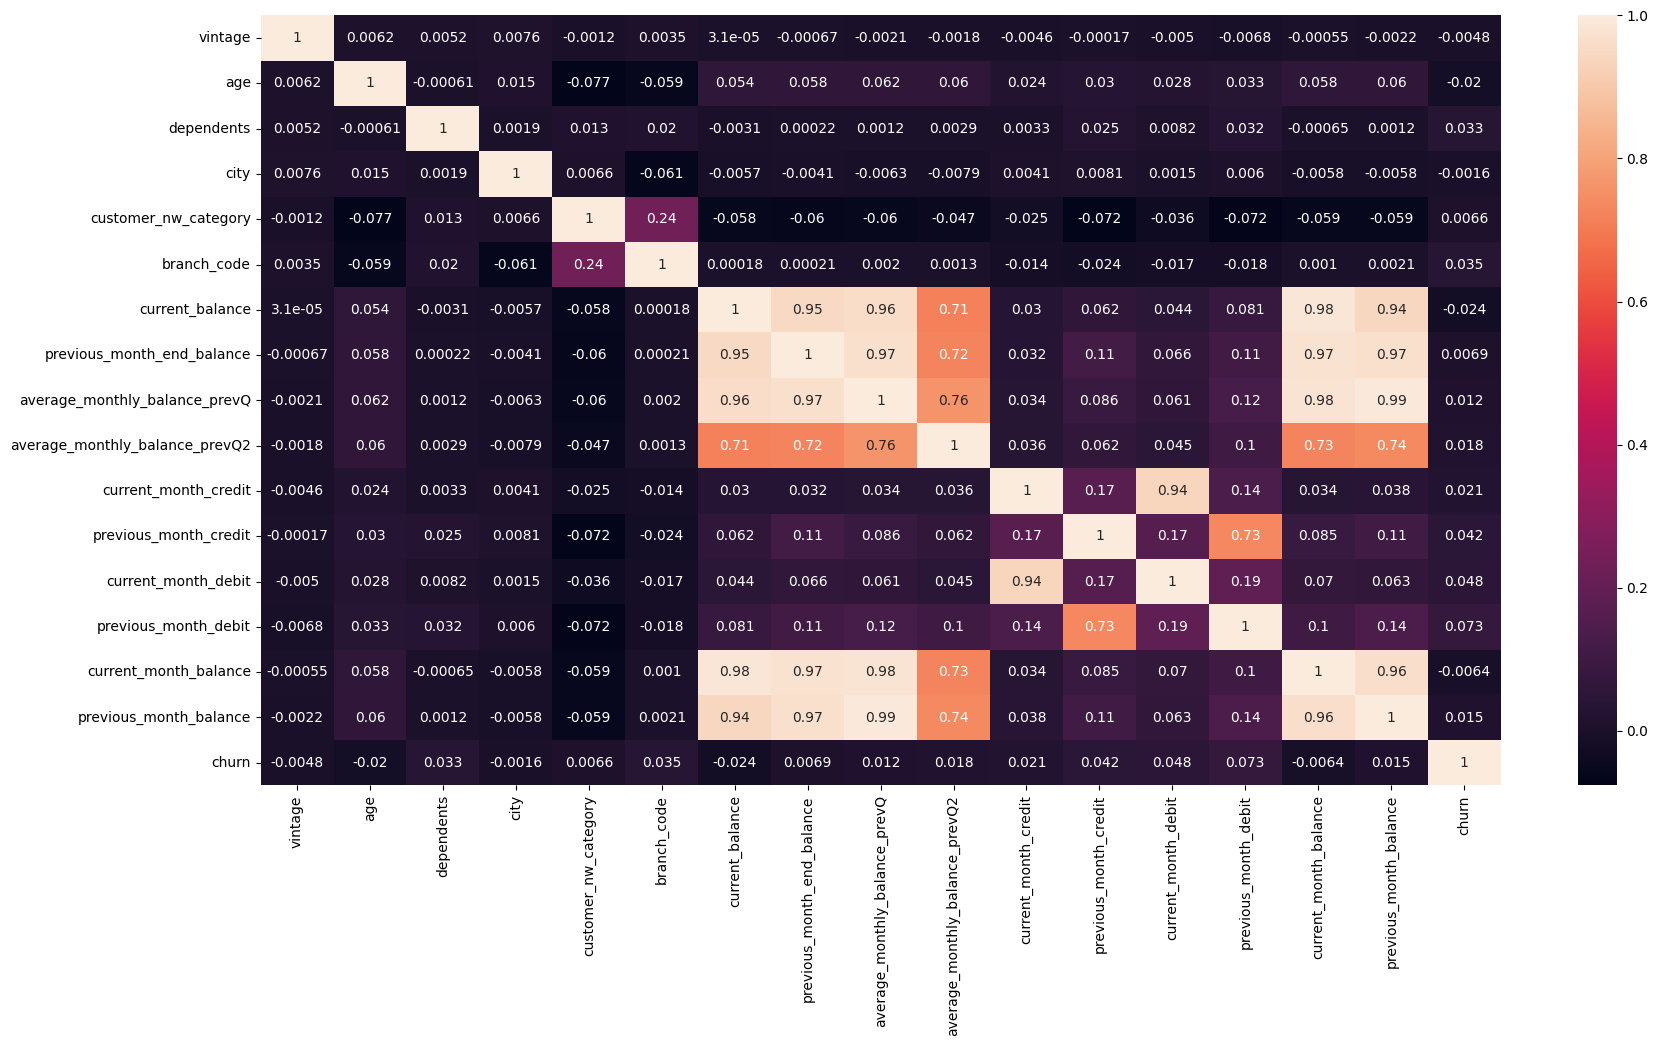

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot = True)
plt.show()

### 1. Assignment : Kolom Kategorikal

In [9]:
def categorical_data(title):
    plt.figure(figsize=(17,8))

    # calculate proportion values for each category
    prop_df = data.groupby([title, 'churn']).size().reset_index(name='count')
    prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())

    g=sns.catplot(x=title, y='prop', kind='bar', hue='churn', palette='viridis', data=prop_df, height=8.27, aspect=11.7/8.27)
    #displays the value of each barplot
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + p.get_width() / 2.,
            p.get_height(),
            '{0:.2f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large', ha='center')
    plt.show()

<ipython-input-9-867d0cf67bcf>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

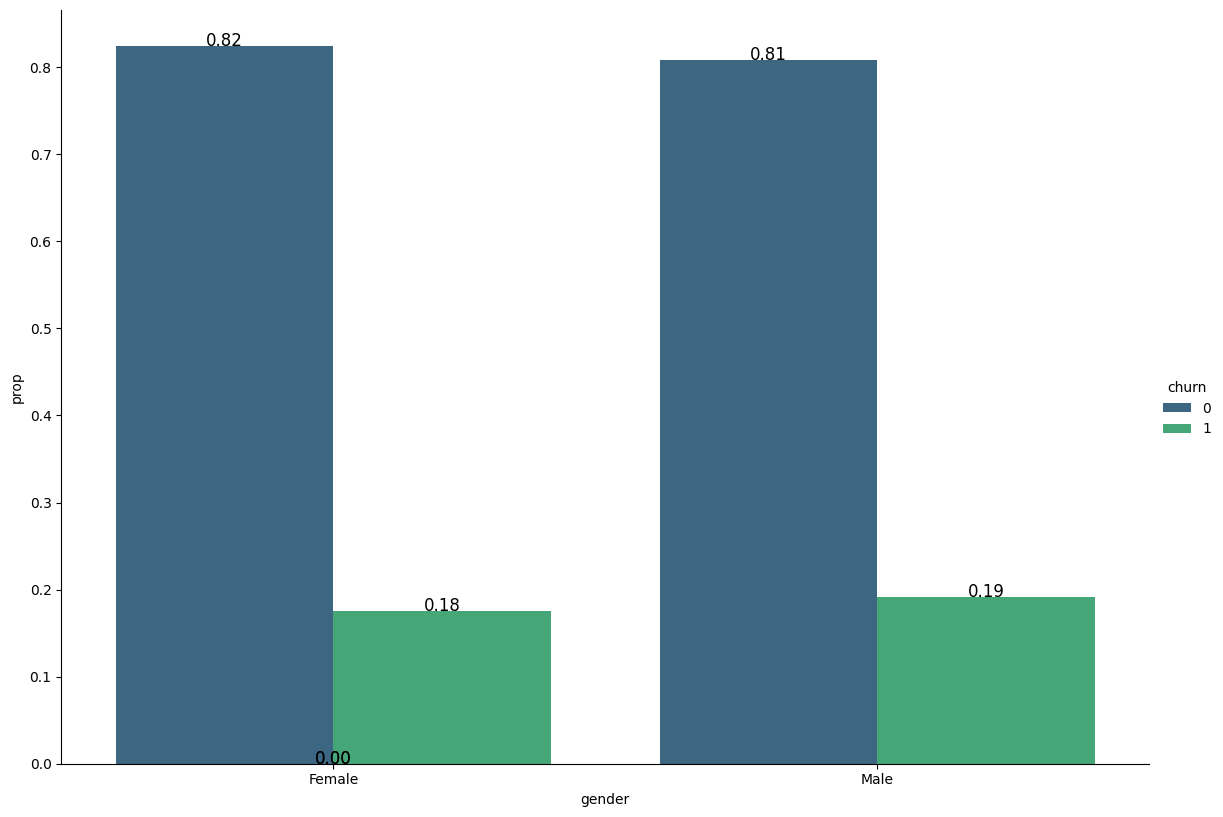

In [10]:
categorical_data("gender")

1. For 'Females':
- A high proportion (approximately 82%) did not churn.
- A smaller proportion (approximately 18%) did churn.

2. For 'Males':
- A similarly high proportion (approximately 81%) did not churn.
- A slightly higher proportion (approximately 19%) churned compared to females.

<ipython-input-9-867d0cf67bcf>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

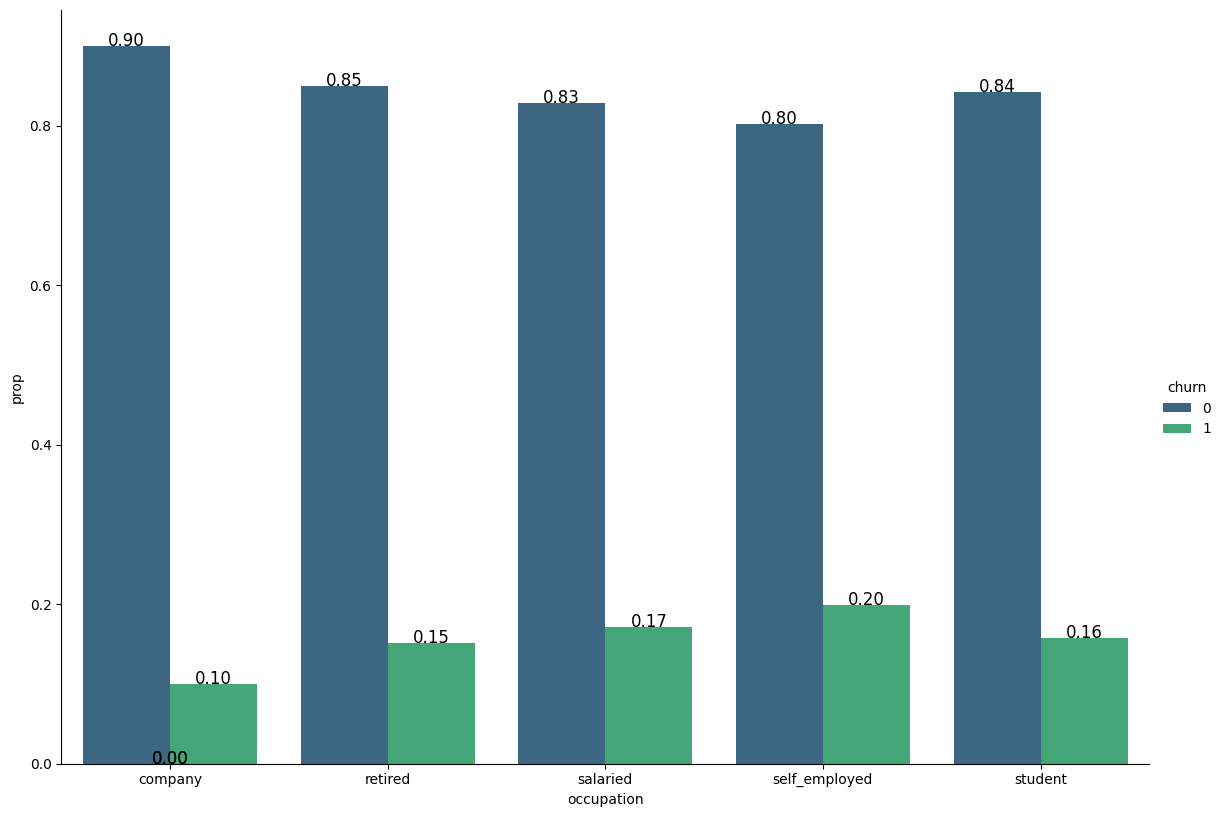

In [11]:
categorical_data("occupation")

1. Company: Almost 90% of individuals associated with a company did not churn, and about 10% did churn.

2. Retired: Approximately 85% of retired individuals did not churn, while about 15% did.

3. Salaried: About 83% of salaried individuals did not churn, compared to
around 17% who did.

4. Self-Employed: Around 80% of self-employed individuals did not churn, while 20% did churn.

5. Student: The proportion of students who did not churn is about 84%, with around 16% churning.

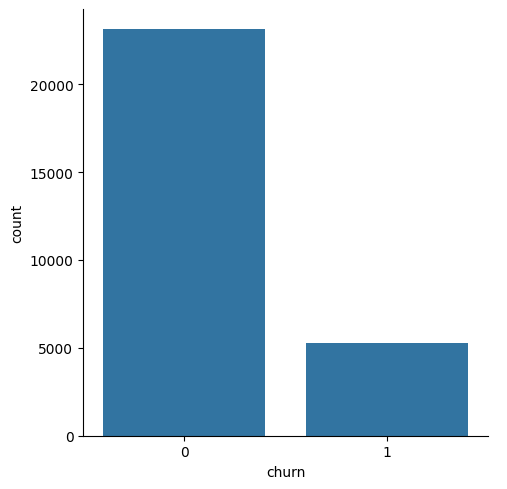

In [12]:
sns.catplot(x = "churn", kind = "count", data = data);

In [13]:
data['churn'].value_counts(normalize=True)

0    0.814671
1    0.185329
Name: churn, dtype: float64

We can observe there imbalance case in our dataset, there are around 81% people not churn and around 18% churn.

We can solve this in two ways:
- While modeling, by adding weight on model parameter
- Post-modeling, by changing classification threhold to optimize metrics such as **F1-Score, precision, recall, etc without using accuracy (bias results because of imbalance target dataset)**


### 2. Assignment : Kolom Numerikal

In [14]:
data.describe()

vintage           age    dependents          city  \
count  28382.000000  28382.000000  25919.000000  27579.000000   
mean    2091.144105     48.208336      0.347236    796.109576   
std      272.676775     17.807163      0.997661    432.872102   
min       73.000000      1.000000      0.000000      0.000000   
25%     1958.000000     36.000000      0.000000    409.000000   
50%     2154.000000     46.000000      0.000000    834.000000   
75%     2292.000000     60.000000      0.000000   1096.000000   
max     2476.000000     90.000000     52.000000   1649.000000   

       customer_nw_category   branch_code  current_balance  \
count          28382.000000  28382.000000     2.838200e+04   
mean               2.225530    925.975019     7.380552e+03   
std                0.660443    937.799129     4.259871e+04   
min                1.000000      1.000000    -5.503960e+03   
25%                2.000000    176.000000     1.784470e+03   
50%                2.000000    572.000000     3.281255e+03   
75%                3.000000   1440.000000     6.635820e+03   
max                3.000000   4782.000000     5.905904e+06   

       previous_month_end_balance  average_monthly_balance_prevQ  \
count                2.838200e+04                   2.838200e+04   
mean                 7.495771e+03                   7.496780e+03   
std                  4.252935e+04                   4.172622e+04   
min                 -3.149570e+03                   1.428690e+03   
25%                  1.906000e+03                   2.180945e+03   
50%                  3.379915e+03                   3.542865e+03   
75%                  6.656535e+03                   6.666887e+03   
max                  5.740439e+06                   5.700290e+06   

       average_monthly_balance_prevQ2  current_month_credit  \
count                    2.838200e+04          2.838200e+04   
mean                     7.124209e+03          3.433252e+03   
std                      4.457581e+04          7.707145e+04   
min                     -1.650610e+04          1.000000e-02   
25%                      1.832507e+03          3.100000e-01   
50%                      3.359600e+03          6.100000e-01   
75%                      6.517960e+03          7.072725e+02   
max                      5.010170e+06          1.226985e+07   

       previous_month_credit  current_month_debit  previous_month_debit  \
count           2.838200e+04         2.838200e+04          2.838200e+04   
mean            3.261694e+03         3.658745e+03          3.339761e+03   
std             2.968889e+04         5.198542e+04          2.430111e+04   
min             1.000000e-02         1.000000e-02          1.000000e-02   
25%             3.300000e-01         4.100000e-01          4.100000e-01   
50%             6.300000e-01         9.193000e+01          1.099600e+02   
75%             7.492350e+02         1.360435e+03          1.357553e+03   
max             2.361808e+06         7.637857e+06          1.414168e+06   

       current_month_balance  previous_month_balance         churn  
count           2.838200e+04            2.838200e+04  28382.000000  
mean            7.451133e+03            7.495177e+03      0.185329  
std             4.203394e+04            4.243198e+04      0.388571  
min            -3.374180e+03           -5.171920e+03      0.000000  
25%             1.996765e+03            2.074407e+03      0.000000  
50%             3.447995e+03            3.465235e+03      0.000000  
75%             6.667958e+03            6.654693e+03      0.000000  
max             5.778185e+06            5.720144e+06      1.000000

#### Numerical vs Churn

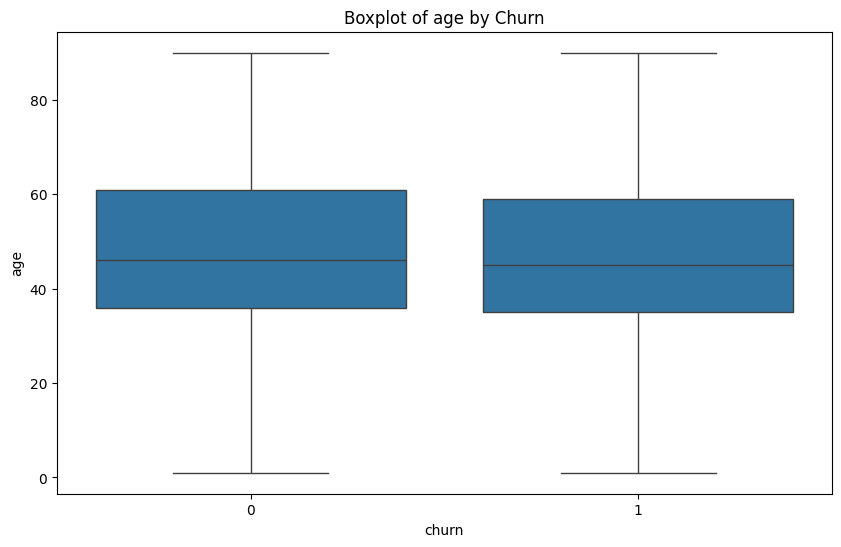

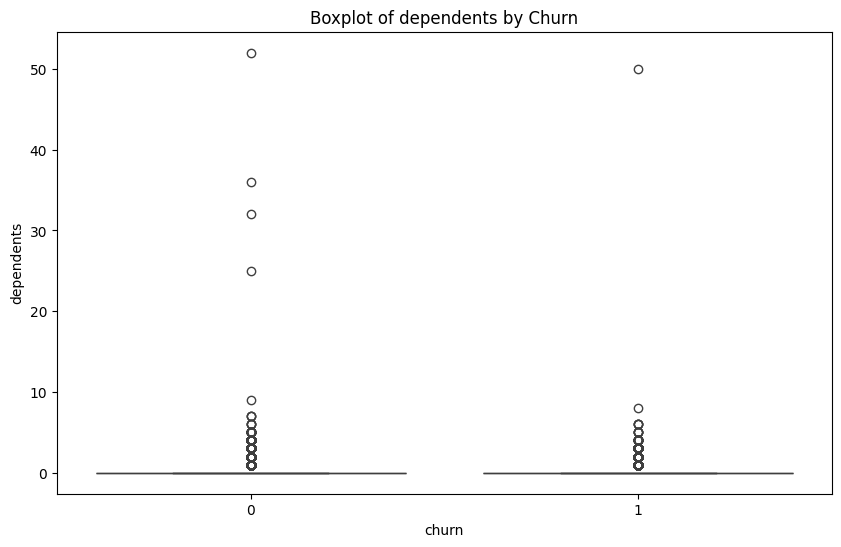

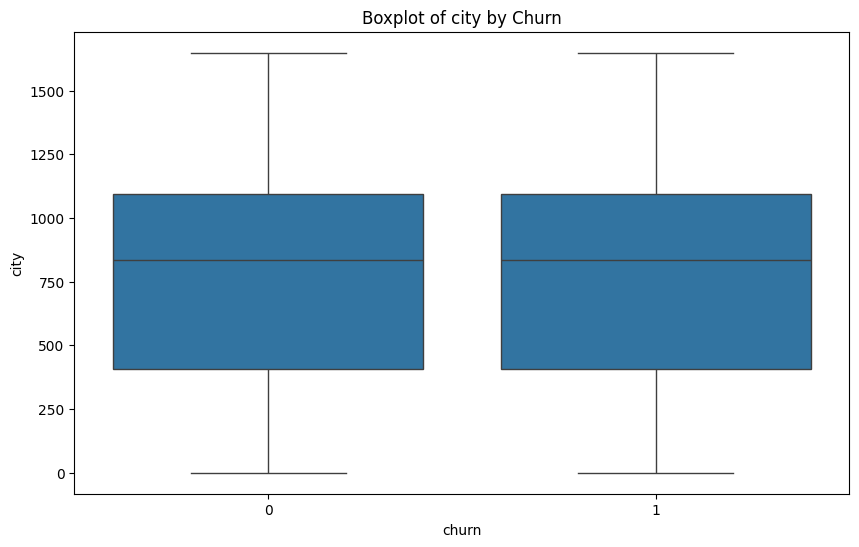

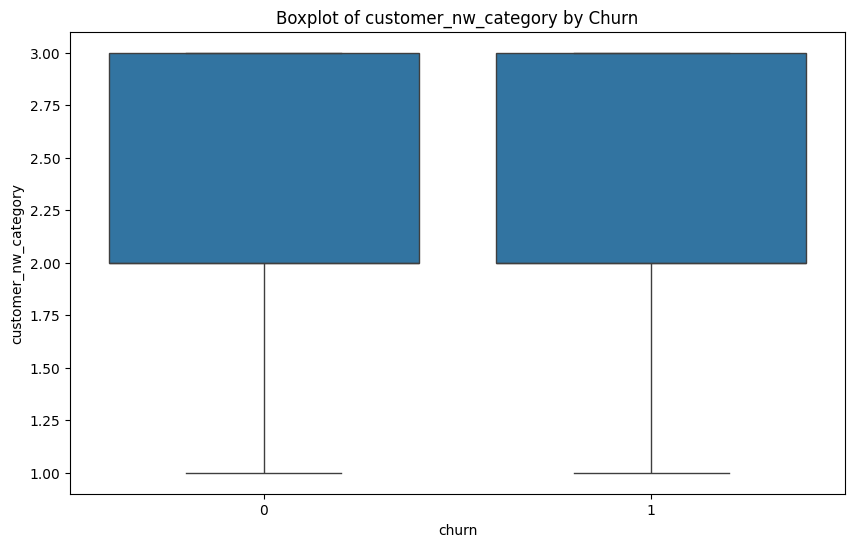

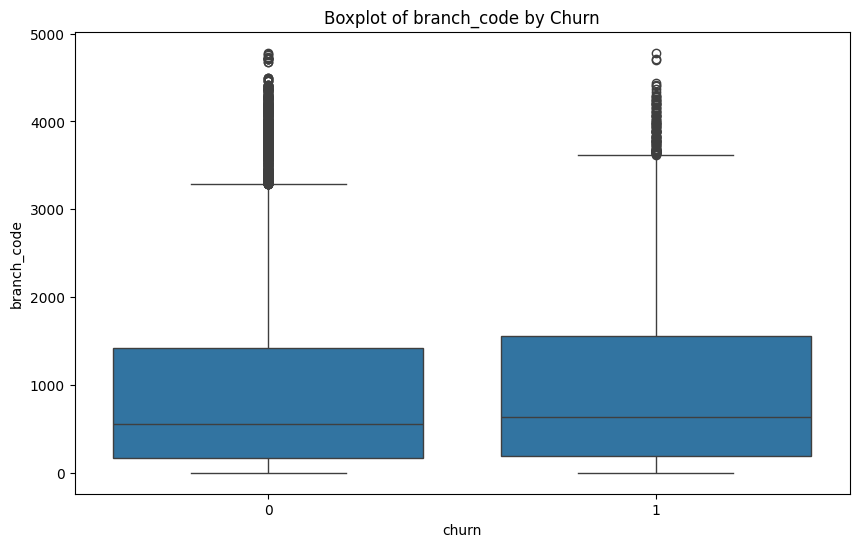

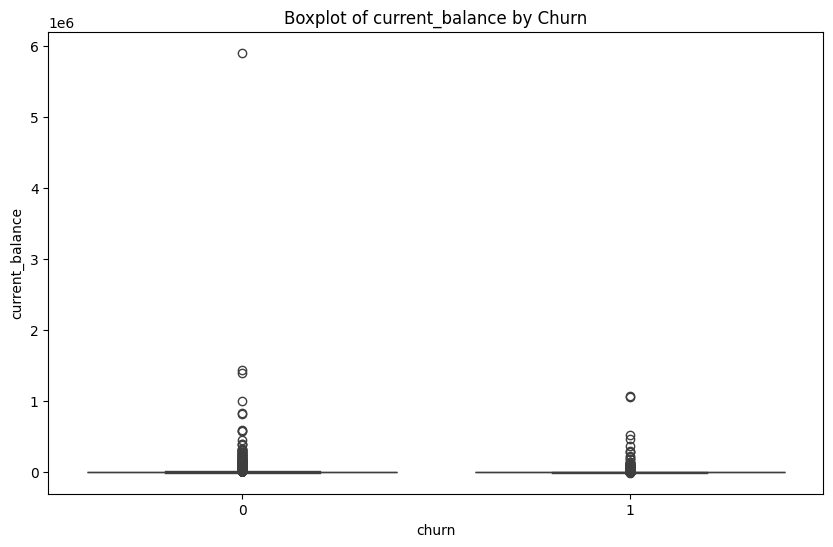

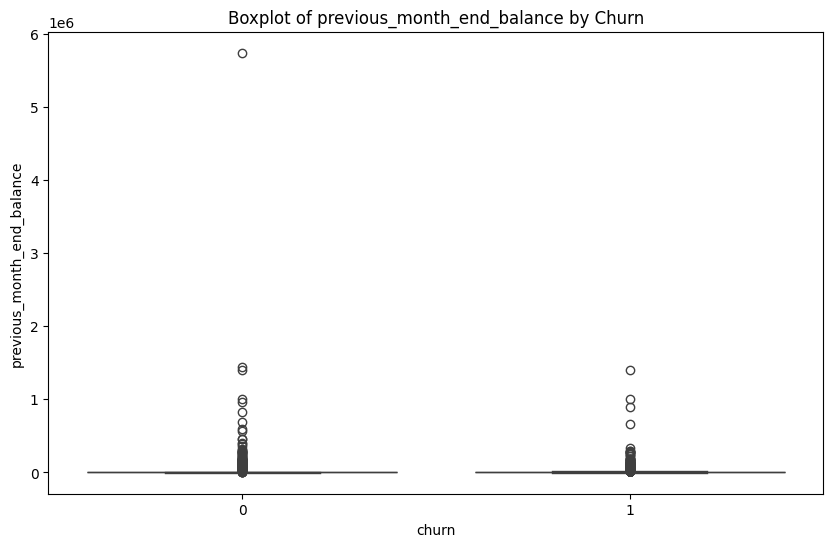

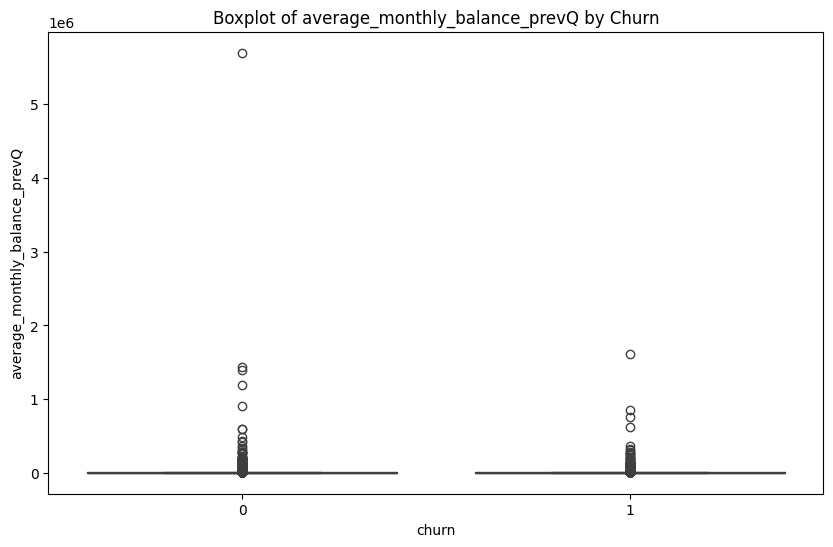

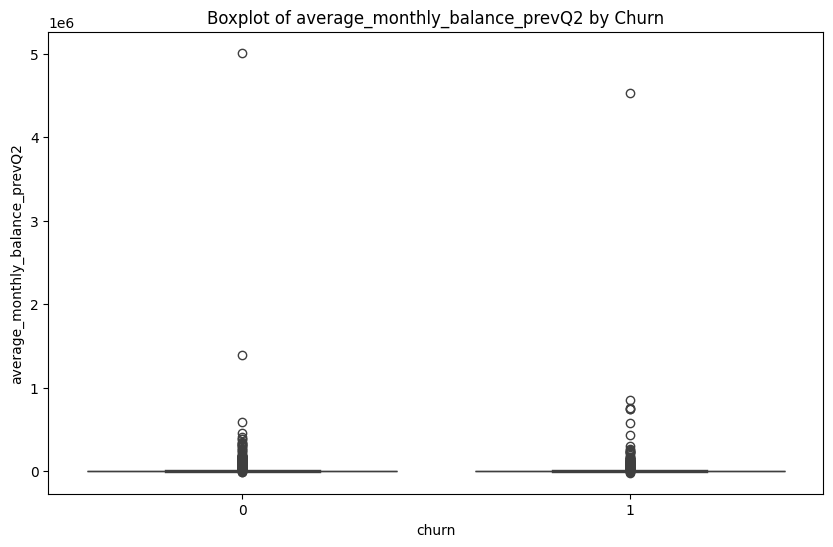

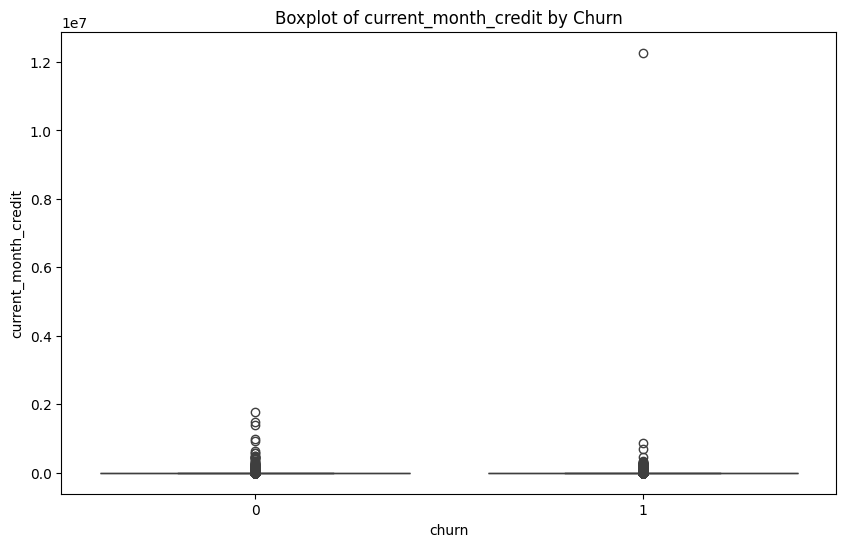

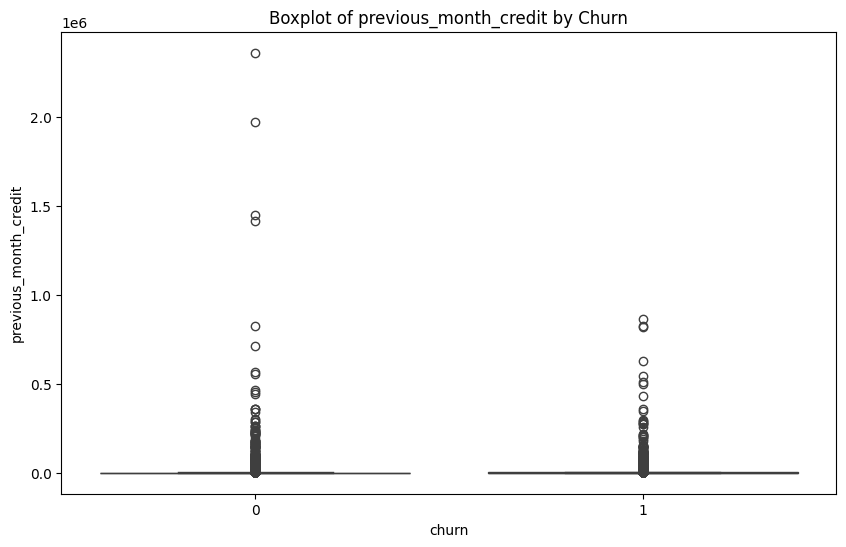

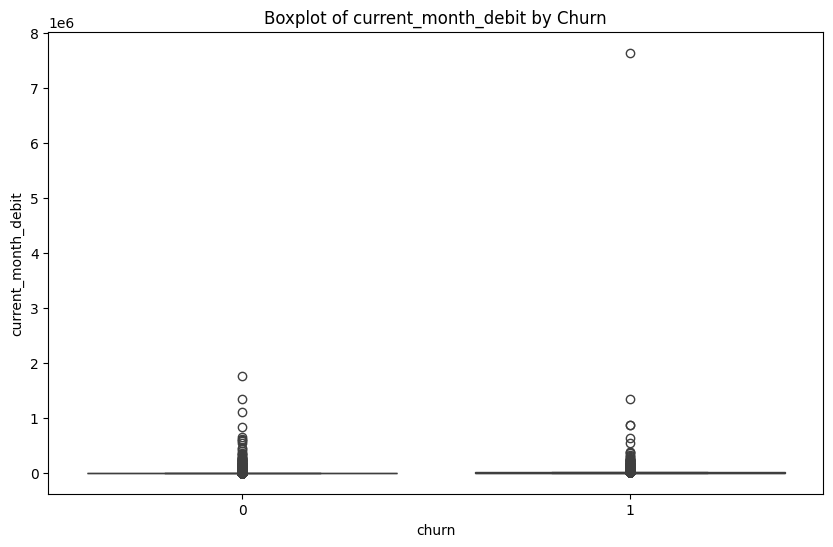

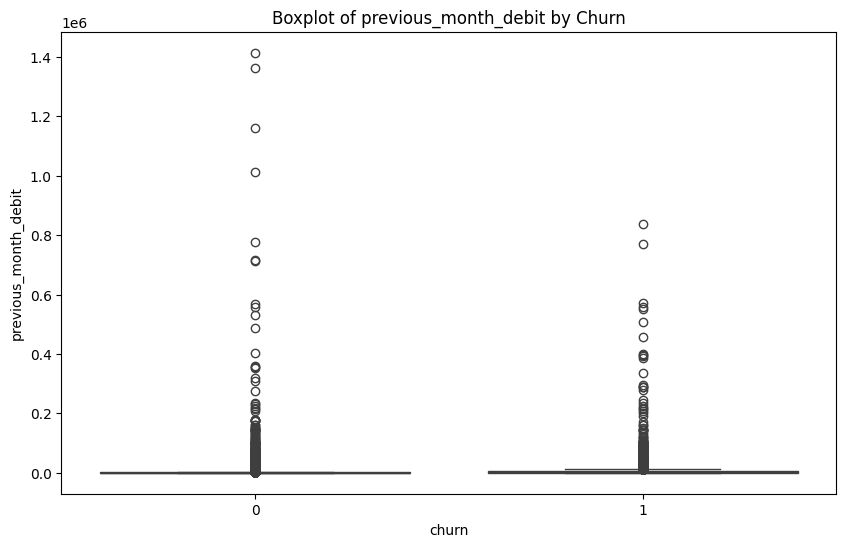

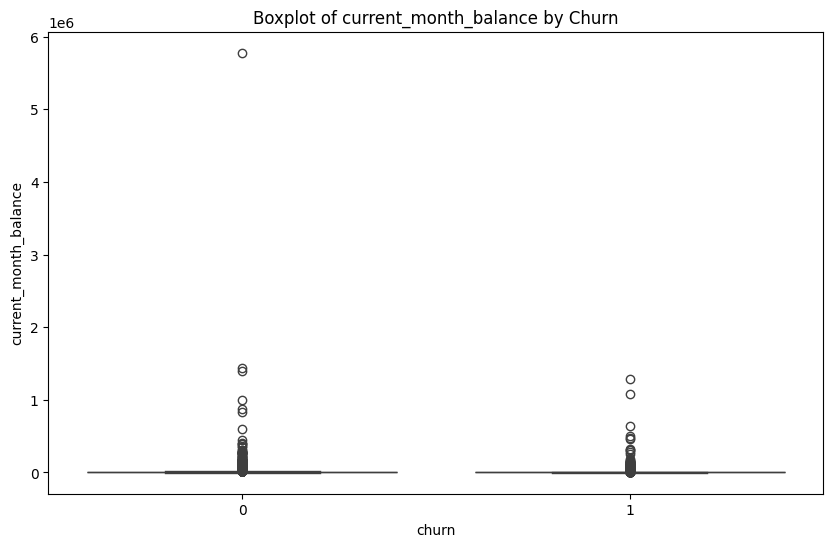

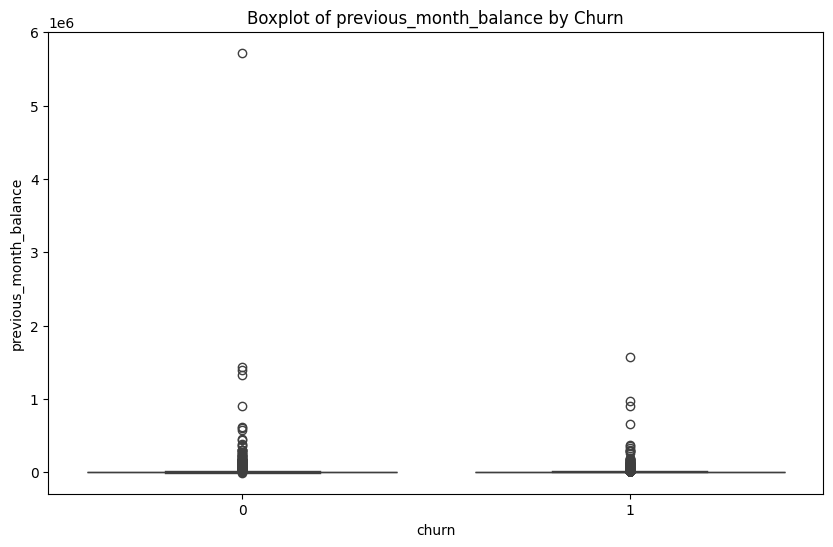

In [15]:
# Check every numerical column against churn
# List column name to check
num_col = ['age','dependents', 'city', 'customer_nw_category', 'branch_code', 'current_balance',
               'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
               'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit',
               'current_month_balance', 'previous_month_balance']

for col in num_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='churn', y=col, data=data)
    plt.title(f'Boxplot of {col} by Churn')
    plt.show()

Summary of above plots:
- Age by churn:
- Dependants by churn:
- City by churn:
- Customer nw category by churn:

- Branch code by churn:
Both categories show a similar interquartile range (the range of the box), but there are many outliers above the upper whisker, especially for the non-churned group ('0').

- Current balance by churn:

- Previous month end balance by churn:

- Average monthly balance prevQ by churn:  

- Average monthly balance prevQ2 by churn:

- Current month credit:

- Previous month credit:

- Current month debit:

- Previous month debit:

- Current month balance:

- Previous month balance:

### Exploratory Data Analysis : Date Data

In [16]:
# Time series trends such as total number of transactions per month:
data['last_transaction'] = pd.to_datetime(data['last_transaction'], errors='coerce')
data['month_year'] = data['last_transaction'].dt.to_period('M')

transactions_per_month = data.groupby('month_year').size()
print(transactions_per_month)

month_year
2018-12        3
2019-01      436
2019-02      406
2019-03      485
2019-04      479
2019-05      593
2019-06      715
2019-07      863
2019-08     1056
2019-09     1425
2019-10     2327
2019-11     3777
2019-12    12594
Freq: M, dtype: int64


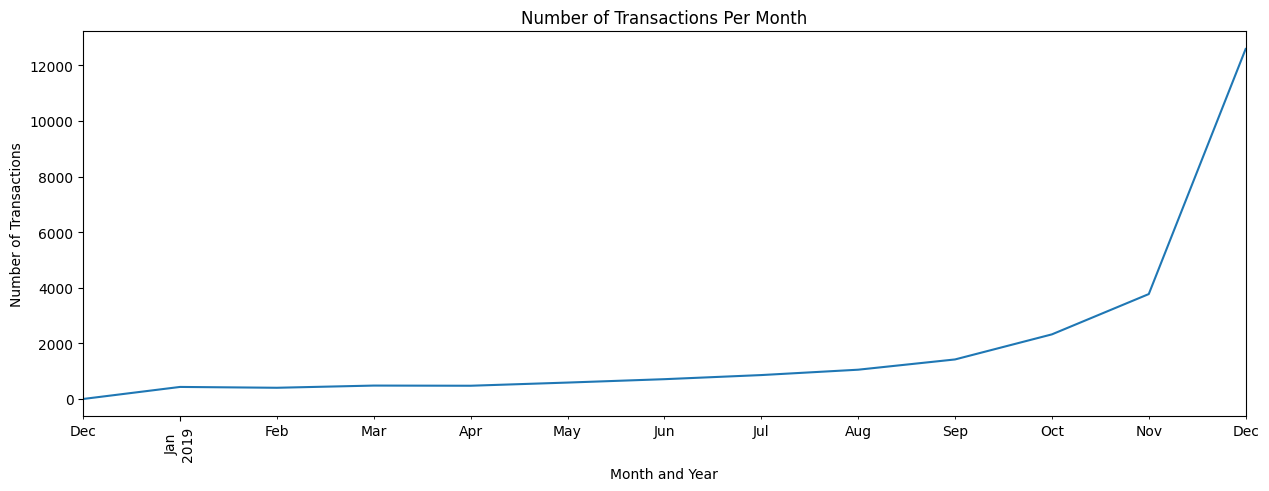

In [17]:
plt.figure(figsize=(15, 5))
transactions_per_month.plot()
plt.title('Number of Transactions Per Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


In [18]:
data = data.drop('month_year', axis=1)

## Train Test Split

In [19]:
#Copy data booking
X = data.copy()
# Splitting to avoid data leakage (train : test = 80% : 20%)
# Stratify to the target column always balance between churn and not churn in train also test
train , test = train_test_split(X,train_size=0.8, random_state=42,stratify=X.churn)

In [20]:
train['churn'].value_counts()

0    18497
1     4208
Name: churn, dtype: int64

In [21]:
4208/(4208+18497)

0.18533362695441533

In [22]:
test['churn'].value_counts()

0    4625
1    1052
Name: churn, dtype: int64

In [23]:
 1052/(1052+4625)

0.18530914215254535

## 3. Assignment Feature Engineering
* Notes : Lakukan proses Feature Engineering berikut :
1. Lakukan Missing Value % Checking dan imputasi missing value di kolom pada dataset yang anda gunakan.
2. Outlier Handling bisa dilakukan atau tidak, tergantung sudut pandang keberadaan terhadap label target, jika terdapat banyak outlier hadir pada label target churn maka sebaiknya bisa dilakukan feature scalling (minmax scaller atau standar scaller) atau transformasi variable seperti logaritmik, akar kuadrat atau lainnya.
3. Encoding : OHE (One Hot Encoding), mean encoding, Label Encoding, atau teknik lainnya.
4. Feature Scalling : boleh dilakukan memakai minmax scaller ataupun standar scaller kemudian lakukan pengecekan distribusi sebelum dan setelah feature scalling menggunakan kdeplot.

* NB : Lakukan kaidah feature engineering (splitting dan teknik lainnya) seperti pada day 4.

## B. Data Preparation : Data Train (Data Pre-Processing)
1. Outliers Analysis
2. Removing Duplicate
2. Missing Value Handling
3. Encoding Preparation
4. Feature Scaling

In this part, data preparation do before modelling, so we treatment the train data. This is done on each data train and data test, so as to avoid data leakage.

##### 1. Outliers Analysis

##### Removing Outliers
Using IQR because from numerical data, the distribution data is not normal distribution

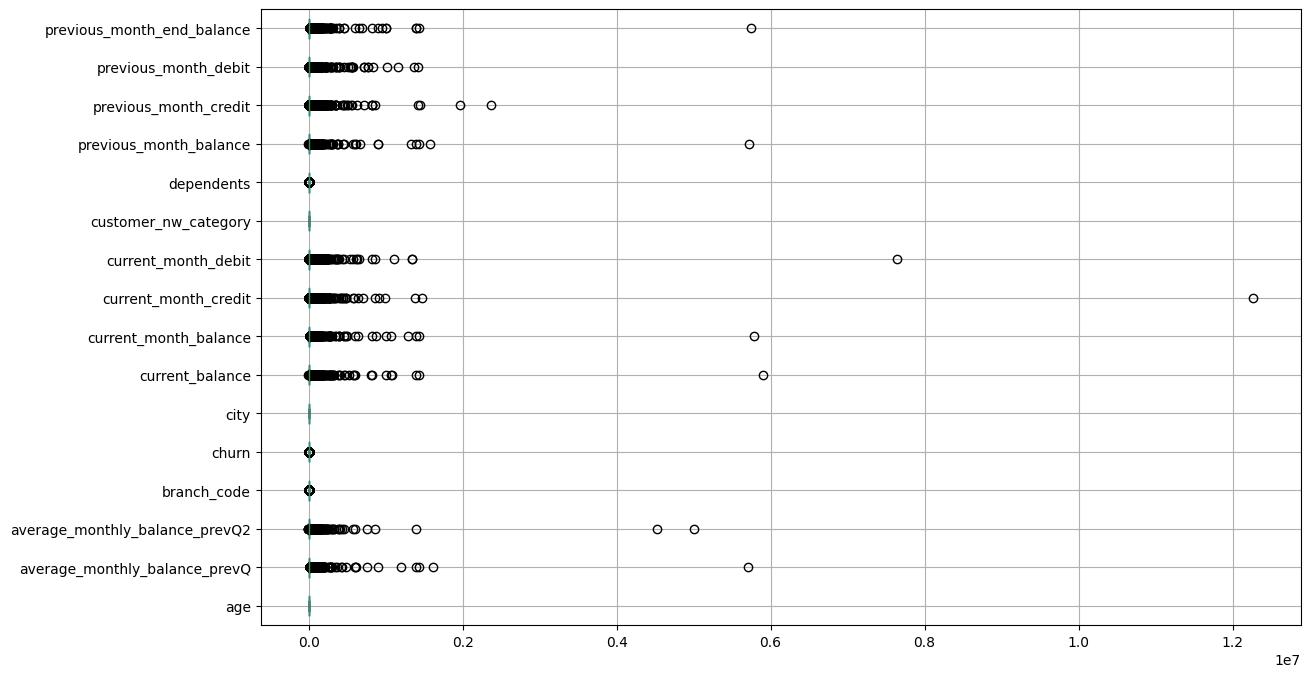

In [24]:
# Outlier Analysis

# Select columns to exclude
exclude_columns = ['vintage']

# Select the subset of the DataFrame excluding the specified columns
train = train[train.columns.difference(exclude_columns)]

# Plotting the boxplot for the selected subset
plt.figure(figsize=(16, 8))
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In this section, we only want to remove outliers on the variables     'current_balance', 'previous_month_end_balance',
    'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
    'current_month_credit', 'previous_month_credit',
    'current_month_debit', 'previous_month_debit',
    'current_month_balance', 'previous_month_balance'.
    
This is because, when we apply removing outliers on all the columns above, there might be a chance when the data are not varied enough to learn for label encoding on the ytrain

###### remove outliers : current_balance

In [25]:
train.shape

(22705, 19)

In [26]:
Q1 = train["current_balance"].quantile(0.25)
Q3 = train["current_balance"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [27]:
train = train[(train["current_balance"] >= low_limit) &
              (train["current_balance"] <= high_limit)
              ]

In [28]:
train.shape

(20496, 19)

###### remove outliers : previous_month_end_balance




In [29]:
train.shape

(20496, 19)

In [30]:
Q1 = train["previous_month_end_balance"].quantile(0.25)
Q3 = train["previous_month_end_balance"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [31]:
train = train[(train["previous_month_end_balance"] >= low_limit) &
              (train["previous_month_end_balance"] <= high_limit)
              ]

In [32]:
train.shape

(19347, 19)

###### remove outliers : average_monthly_balance_prevQ

In [33]:
train.shape

(19347, 19)

In [34]:
Q1 = train["average_monthly_balance_prevQ"].quantile(0.25)
Q3 = train["average_monthly_balance_prevQ"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [35]:
train = train[(train["average_monthly_balance_prevQ"] >= low_limit) &
              (train["average_monthly_balance_prevQ"] <= high_limit)
              ]

In [36]:
train.shape

(18554, 19)

###### remove outliers : average_monthly_balance_prevQ2

In [37]:
train.shape

(18554, 19)

In [38]:
Q1 = train["average_monthly_balance_prevQ2"].quantile(0.25)
Q3 = train["average_monthly_balance_prevQ2"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [39]:
train = train[(train["average_monthly_balance_prevQ2"] >= low_limit) &
              (train["average_monthly_balance_prevQ2"] <= high_limit)
              ]

In [40]:
train.shape

(17748, 19)

###### remove outliers : current_month_credit'

In [41]:
train.shape

(17748, 19)

In [42]:
Q1 = train["current_month_credit"].quantile(0.25)
Q3 = train["current_month_credit"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [43]:
train = train[(train["current_month_credit"] >= low_limit) &
              (train["current_month_credit"] <= high_limit)
              ]

In [44]:
train.shape

(14877, 19)

###### remove outliers : previous_month_credit

In [45]:
train.shape

(14877, 19)

In [46]:
Q1 = train["previous_month_credit"].quantile(0.25)
Q3 = train["previous_month_credit"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [47]:
train = train[(train["previous_month_credit"] >= low_limit) &
              (train["previous_month_credit"] <= high_limit)
              ]

In [48]:
train.shape

(12451, 19)

###### remove outliers : current_month_debit

In [49]:
train.shape

(12451, 19)

In [50]:
Q1 = train["current_month_debit"].quantile(0.25)
Q3 = train["current_month_debit"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [51]:
train = train[(train["current_month_debit"] >= low_limit) &
              (train["current_month_debit"] <= high_limit)
              ]

In [52]:
train.shape

(10615, 19)

###### remove outliers : previous_month_debit

In [53]:
train.shape

(10615, 19)

In [54]:
Q1 = train["previous_month_debit"].quantile(0.25)
Q3 = train["previous_month_debit"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [55]:
train = train[(train["previous_month_debit"] >= low_limit) &
              (train["previous_month_debit"] <= high_limit)
              ]

In [56]:
train.shape

(8952, 19)

###### remove outliers : current_month_balance

In [57]:
train.shape

(8952, 19)

In [58]:
Q1 = train["current_month_balance"].quantile(0.25)
Q3 = train["current_month_balance"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [59]:
train = train[(train["current_month_balance"] >= low_limit) &
              (train["current_month_balance"] <= high_limit)
              ]

In [60]:
train.shape

(8701, 19)

###### remove outliers : previous_month_balance

In [61]:
train.shape

(8701, 19)

In [62]:
Q1 = train["previous_month_balance"].quantile(0.25)
Q3 = train["previous_month_balance"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [63]:
train = train[(train["previous_month_balance"] >= low_limit) &
              (train["previous_month_balance"] <= high_limit)
              ]

In [64]:
train.shape

(8570, 19)

##### 2. Removing Duplicated

In [65]:
train.shape

(8570, 19)

In [66]:
# Check duplicate
duplicates_all_train = train[train.duplicated(keep=False)]
print(f"Total exact duplicate entries in train: {duplicates_all_train.shape[0]}")

Total exact duplicate entries in train: 0


In [67]:
train = train.drop_duplicates(keep='first')
train.shape

(8570, 19)

#### 3. Missing Value Handling

##### Check missing values

In [68]:
train.isna().sum()

age                                  0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
branch_code                          0
churn                                0
city                               268
current_balance                      0
current_month_balance                0
current_month_credit                 0
current_month_debit                  0
customer_nw_category                 0
dependents                         859
gender                             134
last_transaction                  1850
occupation                          19
previous_month_balance               0
previous_month_credit                0
previous_month_debit                 0
previous_month_end_balance           0
dtype: int64

In [69]:
train.isnull().sum()

age                                  0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
branch_code                          0
churn                                0
city                               268
current_balance                      0
current_month_balance                0
current_month_credit                 0
current_month_debit                  0
customer_nw_category                 0
dependents                         859
gender                             134
last_transaction                  1850
occupation                          19
previous_month_balance               0
previous_month_credit                0
previous_month_debit                 0
previous_month_end_balance           0
dtype: int64

##### Missing values check Nan

In [70]:
train.isnull().sum().sum()

3130

In [71]:
train.isnull().any().any()

True

In [72]:
count_nan = train.isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: age                                  0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
branch_code                          0
churn                                0
city                               268
current_balance                      0
current_month_balance                0
current_month_credit                 0
current_month_debit                  0
customer_nw_category                 0
dependents                         859
gender                             134
last_transaction                  1850
occupation                          19
previous_month_balance               0
previous_month_credit                0
previous_month_debit                 0
previous_month_end_balance           0
dtype: int64


In [73]:
for column in train.columns[1:]:
    print(f"============= {column} =================")
    display(train[column].value_counts())
    print()

============= average_monthly_balance_prevQ =================


1795.60    2
6123.08    2
2124.33    2
5166.46    2
2491.45    2
1793.39    2
1897.00    2
4927.92    2
3165.42    2
1754.83    2
1436.35    2
2671.03    2
2268.11    2
1585.90    2
2094.86    2
1961.81    2
2413.49    2
1438.59    2
2002.29    2
2476.68    2
1790.29    2
1444.51    2
1529.68    2
1975.77    2
1882.42    2
1645.02    2
3062.75    2
1581.59    2
1525.56    2
1456.74    2
1474.52    2
3138.86    2
4502.37    2
1867.33    2
1438.57    2
1471.93    2
1710.67    2
1528.87    2
3836.15    2
4661.45    2
2727.69    2
6906.10    2
1906.21    2
1936.18    2
1905.57    2
1572.66    2
1525.00    2
1711.05    2
5476.73    2
2427.37    2
4530.04    2
2009.80    2
2702.06    2
3591.21    2
2188.91    2
1775.85    2
1779.07    2
1541.10    2
2185.85    2
1429.00    2
3041.65    2
2871.60    2
2745.63    2
1757.15    2
2838.89    2
1490.68    2
1600.73    2
1659.65    2
2941.22    2
3127.05    2
3075.18    2
1750.34    2
1509.21    2
1541.08    2
2036.82    2
1559.74    2
1785.47    2


============= average_monthly_balance_prevQ2 =================


 1860.66    2
 1564.87    2
 4467.42    2
 4025.42    2
 732.31     2
 5997.53    2
 2279.24    2
 2218.50    2
 3263.63    2
 1788.22    2
 1020.92    2
 5871.61    2
 1510.21    2
 2557.00    2
 3345.68    2
 2318.67    2
 1597.58    2
 1313.04    2
 1471.48    2
 3738.02    2
 1543.95    2
 1359.21    2
 1996.20    2
 2734.87    2
 2251.08    2
 2266.34    2
 1718.65    2
 2376.18    2
 5136.41    2
 4369.11    2
 1267.19    2
 3063.16    2
 4709.79    2
 5515.43    2
 3423.72    2
 2196.95    2
 1268.80    2
 2462.32    2
 1915.02    2
 2376.86    2
 4276.16    2
 2580.60    2
 4524.04    2
 1951.84    2
 2140.94    2
 2042.93    2
 3924.48    2
 1232.67    2
 299.47     2
 1549.64    2
 4688.38    2
 3351.01    2
 1140.17    2
 2479.19    2
 4441.96    2
 4094.77    1
 4392.40    1
 9134.86    1
 2222.47    1
 2300.37    1
 3651.48    1
 9301.22    1
 9120.16    1
 2190.41    1
 1839.58    1
 2915.86    1
 3658.76    1
 4558.13    1
 6102.21    1
 681.60     1
 3556.58    1
 2050.


============= branch_code =================


15      35
6       34
19      34
33      31
3       29
146     29
13      28
92      28
145     27
47      26
60      26
8       26
27      25
2       25
54      24
7       24
22      24
235     24
84      22
52      22
501     22
18      22
79      22
1       22
16      22
176     21
12      21
5       21
93      21
36      20
104     20
114     20
68      20
212     19
115     19
44      19
26      19
34      19
120     19
273     19
249     19
67      19
101     18
149     18
11      17
144     17
540     17
105     17
177     17
42      17
137     17
89      17
143     17
239     17
88      17
90      16
41      16
136     16
69      16
159     16
75      16
32      15
300     15
279     15
14      15
151     15
64      15
411     15
227     15
10      15
258     15
139     15
190     15
43      15
327     15
174     14
210     14
134     14
147     14
158     14
102     14
455     14
53      14
219     14
275     14
49      13
737     13
163     13
81      13
121     13
38      13


============= churn =================


0    7910
1     660
Name: churn, dtype: int64


============= city =================


1020.0    946
1096.0    558
409.0     403
834.0     336
146.0     331
334.0     254
1232.0    243
623.0     213
15.0      192
575.0     151
1525.0    123
905.0     115
491.0      94
649.0      87
1494.0     83
1084.0     80
318.0      77
531.0      77
1111.0     76
61.0       74
1589.0     71
1181.0     69
904.0      67
656.0      60
630.0      59
1271.0     50
1150.0     44
745.0      41
578.0      40
1076.0     38
621.0      37
996.0      33
1046.0     29
241.0      28
665.0      27
1388.0     27
169.0      27
1540.0     27
485.0      27
822.0      25
1322.0     25
1598.0     25
162.0      25
1294.0     24
1258.0     24
980.0      23
224.0      22
1438.0     22
1477.0     21
363.0      21
1180.0     20
664.0      20
221.0      20
11.0       19
617.0      19
1154.0     18
514.0      18
243.0      17
1597.0     17
751.0      17
1643.0     17
611.0      17
38.0       14
1570.0     14
615.0      14
557.0      14
848.0      13
762.0      13
1315.0     13
102.0      13
1004.0     13
856.0 


============= current_balance =================


1429.14     4
1428.73     4
1428.94     3
2968.82     2
1486.45     2
3074.52     2
1711.05     2
2860.83     2
3129.49     2
2427.37     2
1357.59     2
1993.54     2
4070.54     2
2869.41     2
1673.36     2
2150.54     2
2165.30     2
1429.17     2
4516.40     2
2577.12     2
2655.14     2
6152.90     2
2476.37     2
1429.19     2
1768.48     2
2151.76     2
1438.59     2
1976.27     2
2289.92     2
1575.16     2
3738.86     2
1428.70     2
2204.11     2
944.49      2
1980.71     2
2515.09     2
1429.00     2
1662.23     2
1888.30     2
3226.68     2
1965.13     2
4659.32     2
1882.53     2
3386.62     2
2720.19     2
5166.30     2
2248.96     2
4249.96     2
1442.07     2
1441.10     2
1429.07     2
3133.77     2
2159.13     2
1710.67     2
3489.93     2
2059.04     2
1960.56     2
1428.76     2
3195.02     2
2938.89     2
3179.71     2
2228.57     2
1602.05     2
1428.83     2
4500.44     2
1756.47     2
2941.22     2
1818.48     2
1797.24     2
3500.49     2
1668.68     2
1450.1


============= current_month_balance =================


1549.92    3
1429.14    3
2180.48    2
2481.20    2
1620.78    2
2123.35    2
2669.37    2
1430.81    2
2088.56    2
2165.30    2
1817.62    2
3044.71    2
1853.07    2
2498.21    2
4809.81    2
3346.36    2
1438.59    2
3242.92    2
1754.90    2
1546.46    2
1439.59    2
1292.20    2
1429.00    2
2296.96    2
1479.45    2
1985.88    2
2403.69    2
2172.71    2
4349.33    2
3158.50    2
2668.51    2
2037.36    2
1486.45    2
1792.43    2
2164.91    2
1487.20    2
2137.23    2
2054.94    2
1897.44    2
3050.41    2
2143.96    2
5361.40    2
2941.22    2
1467.95    2
2650.90    2
1429.07    2
2860.83    2
3486.71    2
1710.67    2
1900.15    2
1711.05    2
2507.06    2
1547.19    2
1512.12    2
1754.83    2
3195.02    2
1663.03    2
3096.49    2
1629.62    2
1889.36    2
3118.77    2
3772.12    2
2133.68    2
5063.50    2
2916.76    2
1428.83    2
1961.81    2
4008.02    2
2870.82    2
3599.45    2
1428.70    2
2237.98    2
5166.30    2
1428.76    2
2454.36    2
2450.30    2
1428.73    2


============= current_month_credit =================


0.60       162
0.37       160
0.56       159
0.24       156
0.44       150
0.03       150
0.50       149
0.09       146
0.51       146
0.47       146
0.14       145
0.07       144
0.30       143
0.43       143
0.27       143
0.16       142
0.46       142
0.10       142
0.63       141
0.20       141
0.49       140
0.39       139
0.21       139
0.31       138
0.67       138
0.17       137
0.04       137
0.59       136
0.54       136
0.57       135
0.33       135
0.13       134
0.01       133
0.69       133
0.19       132
0.66       131
0.41       130
0.53       128
0.06       124
0.26       124
0.64       121
0.34       120
0.23       119
0.70       116
0.29       115
0.40       114
0.36       113
0.11       112
0.61       106
286.30       6
143.51       5
714.47       5
714.64       5
143.01       5
143.37       5
714.91       5
286.06       4
71.60        4
642.87       4
72.11        4
214.63       4
357.47       4
214.37       4
286.17       3
72.10        3
286.14       3
314.63    


============= current_month_debit =================


0.37      144
0.60      140
0.56      139
0.17      138
0.50      136
0.21      135
0.47      135
0.07      134
0.16      132
0.09      131
0.59      131
0.39      130
0.14      129
0.44      128
0.24      128
0.33      127
0.69      127
0.19      126
0.13      125
0.30      125
0.03      125
0.43      124
0.57      124
0.67      123
0.46      123
0.63      122
0.31      121
0.53      121
0.04      121
0.01      119
0.23      118
0.41      118
0.10      117
0.20      116
0.54      115
0.27      115
0.51      114
0.26      114
0.66      114
0.06      114
0.49      113
0.36      112
0.40      107
0.64      107
0.11      104
0.34      104
0.61      103
0.70      102
0.29      100
143.34      7
143.16      6
14.97       6
286.26      5
85.89       5
14.77       5
143.10      5
286.17      5
286.40      5
143.00      5
143.31      5
285.83      5
143.23      4
571.69      4
143.41      4
29.23       4
143.14      4
143.11      4
285.97      4
143.21      4
71.97       4
143.47      4
428.89


============= customer_nw_category =================


2    4363
3    3466
1     741
Name: customer_nw_category, dtype: int64


============= dependents =================


0.0     6841
2.0      391
1.0      288
3.0      141
4.0       40
5.0        7
6.0        1
52.0       1
32.0       1
Name: dependents, dtype: int64


============= gender =================


Male      4523
Female    3913
Name: gender, dtype: int64


============= last_transaction =================


2019-12-31    158
2019-12-28    112
2019-12-17     99
2019-12-03     92
2019-12-10     84
2019-12-11     83
2019-12-25     82
2019-12-18     82
2019-12-07     81
2019-12-26     80
2019-12-13     77
2019-12-12     75
2019-12-08     75
2019-12-22     74
2019-12-14     72
2019-12-04     72
2019-12-19     71
2019-12-05     71
2019-12-06     66
2019-12-27     66
2019-12-20     65
2019-12-24     63
2019-10-31     56
2019-10-30     55
2019-12-21     51
2019-09-27     50
2019-10-16     50
2019-10-29     49
2019-10-01     49
2019-11-01     48
2019-10-15     43
2019-11-21     43
2019-10-20     41
2019-09-14     41
2019-10-18     39
2019-11-29     39
2019-11-28     39
2019-11-30     39
2019-11-13     38
2019-10-24     38
2019-10-05     37
2019-10-06     37
2019-09-20     37
2019-09-17     37
2019-09-19     36
2019-10-09     36
2019-10-23     36
2019-10-04     36
2019-10-11     36
2019-09-06     35
2019-11-12     35
2019-10-22     35
2019-10-19     34
2019-10-17     34
2019-10-03     33
2019-09-18


============= occupation =================


self_employed    5112
salaried         1799
student           941
retired           685
company            14
Name: occupation, dtype: int64


============= previous_month_balance =================


1429.14    3
2844.26    2
2965.60    2
2895.47    2
1710.67    2
2863.58    2
4473.15    2
1536.91    2
4635.31    2
2451.38    2
1623.08    2
4466.26    2
1711.05    2
1585.71    2
1798.36    2
3537.87    2
2813.98    2
1428.60    2
3550.14    2
1486.45    2
2577.12    2
4230.71    2
1464.51    2
2476.96    2
2478.64    2
2956.50    2
3876.71    2
1778.00    2
1845.32    2
1578.82    2
2093.72    2
1961.81    2
2100.40    2
4116.37    2
2836.12    2
2400.75    2
1428.83    2
2884.78    2
2413.91    2
1722.07    2
5646.04    2
4639.15    2
4770.80    2
1965.32    2
2384.39    2
3177.47    2
1429.00    2
2153.25    2
4190.19    2
1502.59    2
1428.94    2
3572.73    2
1529.04    2
1864.49    2
1857.07    2
4505.19    2
2647.21    2
1603.90    2
2029.35    2
1790.53    2
2013.64    2
3265.58    2
2164.91    2
2197.55    2
1960.09    2
1874.04    2
1632.04    2
1621.22    2
1597.49    2
1524.48    2
1458.90    2
3532.80    2
1558.31    2
3164.05    2
1724.98    2
7450.80    2
1490.32    2


============= previous_month_credit =================


0.60      166
0.56      162
0.24      160
0.37      160
0.44      157
0.50      154
0.51      151
0.14      150
0.33      150
0.03      150
0.59      147
0.63      145
0.01      145
0.31      145
0.30      145
0.47      144
0.46      143
0.13      142
0.09      141
0.21      141
0.16      141
0.07      141
0.54      140
0.39      140
0.27      139
0.49      139
0.19      138
0.10      138
0.57      137
0.67      137
0.20      136
0.17      136
0.66      135
0.43      135
0.69      135
0.41      134
0.23      133
0.04      130
0.36      129
0.06      128
0.53      126
0.26      126
0.70      126
0.64      123
0.40      119
0.34      118
0.29      110
0.11      110
0.61      106
214.46      5
571.71      5
286.14      4
714.80      4
0.98        4
286.17      4
214.81      4
428.94      4
286.30      4
357.20      4
714.47      4
257.60      3
571.81      3
72.09       3
357.46      3
500.61      3
643.53      3
143.34      3
643.10      3
71.67       3
71.60       3
142.93      3
143.04


============= previous_month_debit =================


0.37      146
0.60      143
0.21      139
0.33      139
0.59      138
0.47      137
0.24      136
0.57      135
0.50      135
0.46      135
0.17      135
0.56      134
0.44      133
0.63      133
0.19      132
0.09      131
0.14      130
0.27      129
0.03      129
0.01      128
0.43      128
0.31      125
0.13      125
0.10      125
0.07      124
0.39      124
0.30      123
0.53      122
0.04      121
0.49      121
0.69      120
0.16      120
0.51      118
0.20      117
0.67      116
0.54      116
0.66      116
0.70      115
0.06      115
0.34      112
0.26      112
0.36      110
0.23      109
0.61      108
0.40      106
0.41      104
0.11      104
0.64      104
0.29      100
143.37      7
72.10       6
143.21      6
286.13      5
143.06      5
286.03      5
71.84       5
286.14      5
143.46      5
143.01      5
286.26      5
285.86      5
357.59      5
286.21      4
143.49      4
143.09      4
143.03      4
286.06      4
142.87      4
143.47      4
428.70      4
14.91       4
285.74


============= previous_month_end_balance =================


1428.73     3
1429.14     3
1428.83     3
1428.60     2
3056.21     2
2577.12     2
1429.17     2
1557.93     2
5744.05     2
1556.24     2
1445.26     2
1429.19     2
3853.17     2
3872.88     2
1916.46     2
3763.70     2
1549.33     2
1517.55     2
1711.83     2
6663.16     2
2725.84     2
1598.40     2
1961.81     2
3769.11     2
2617.13     2
4893.23     2
1486.45     2
1537.05     2
1737.98     2
1710.67     2
2257.76     2
4428.54     2
4078.51     2
2772.63     2
3583.19     2
3322.18     2
2860.83     2
2223.86     2
2887.42     2
3020.56     2
2860.58     2
1711.05     2
5166.30     2
4505.19     2
3141.24     2
1823.21     2
2590.48     2
1511.60     2
2518.78     2
1892.23     2
1438.59     2
1714.74     2
2869.37     2
1428.94     2
2941.22     2
2227.59     2
1924.27     2
3393.08     2
2188.61     2
4116.37     2
1428.76     2
1866.02     2
1429.00     2
2542.81     2
3473.55     2
3317.01     2
1568.31     2
2737.84     2
4376.03     2
2667.85     2
1525.34     2
1916.0

##### Check percentage of missing value in each column selection

In [74]:
#check percentage missing value
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  \
age                                                        age   
average_monthly_balance_prevQ    average_monthly_balance_prevQ   
average_monthly_balance_prevQ2  average_monthly_balance_prevQ2   
branch_code                                        branch_code   
churn                                                    churn   
city                                                      city   
current_balance                                current_balance   
current_month_balance                    current_month_balance   
current_month_credit                      current_month_credit   
current_month_debit                        current_month_debit   
customer_nw_category                      customer_nw_category   
dependents                                          dependents   
gender                                                  gender   
last_transaction                              last_transaction   
occupation                                          occupation   
previous_month_balance                  previous_month_balance   
previous_month_credit                    previous_month_credit   
previous_month_debit                      previous_month_debit   
previous_month_end_balance          previous_month_end_balance   

                                percent_missing  
age                                    0.000000  
average_monthly_balance_prevQ          0.000000  
average_monthly_balance_prevQ2         0.000000  
branch_code                            0.000000  
churn                                  0.000000  
city                                   3.127188  
current_balance                        0.000000  
current_month_balance                  0.000000  
current_month_credit                   0.000000  
current_month_debit                    0.000000  
customer_nw_category                   0.000000  
dependents                            10.023337  
gender                                 1.563594  
last_transaction                      21.586931  
occupation                             0.221704  
previous_month_balance                 0.000000  
previous_month_credit                  0.000000  
previous_month_debit                   0.000000  
previous_month_end_balance             0.000000

From the result code above, we saw that there are also missing value in several columns. Below is the list of all missing value for each column :
- gender : NaN
- dependents : NaN
- occupation : NaN
- city : NaN
- last_transaction : NaN
- columns related finances : negative values

Now we know what are the missing values contained in each of the columns. Next, we have to decide how should we act on those columns that have missing values.

**If it contained a lot of missing value (let say >35%), then we can just drop that column**. If not, then we can do some imputation.

###### Imputation data for : Gender

In [75]:
# Calculate the mode for the 'gender' column
mode_gender_train = train['gender'].mode()[0]

# Replace NaN values with the mode
train['gender'] = train['gender'].fillna(mode_gender_train)

# Verify the operation
print(train['gender'].isnull().sum())  # If if all NaNs are filled, it should be 0

0


###### Imputation data for : Dependants

In [76]:
# Convert the 'dependents' column to numeric, coercing 'NaN' strings to NaN values
train['dependents'] = pd.to_numeric(train['dependents'], errors='coerce')

# Calculate the median without NaN values
median_dependants_train = train['dependents'].median()

# Replace NaN values with the median
train['dependents'] = train['dependents'].fillna(median_dependants_train)

###### Imputation data for : Occupation

In [77]:
# Calculate the mode for the 'occupation' column
mode_occupation_train = train['occupation'].mode()[0]

# Replace NaN values with the mode
train['occupation'] = train['occupation'].fillna(mode_gender_train)

# Verify the operation
print(train['occupation'].isnull().sum())  # If if all NaNs are filled, it should be 0

0


###### Imputation data for : City

Categorical variables like "city" are often encoded as numerical values. Each unique number represents a different category. This is done maybe for memory efficiency or model requirements

In [78]:
# Convert 'NaN' strings to np.nan
train['city'] = train['city'].replace('NaN', np.nan)

# Impute with mode
mode_city = train['city'].mode()[0]
train['city'] = train['city'].fillna(mode_city)

In [79]:
print(train['city'].isnull().sum())  # Should be 0 if all NaNs are filled

0


###### Imputation data for : last_transaction

Imputing datetime variables can be a bit more complex than numerical imputations because the mean or median concepts don't directly apply. Hence we are using a Fixed Date

In [80]:
# Using a specific date far in the past to denote missing dates
fixed_date = pd.to_datetime('1900-01-01')
train['last_transaction'] = train['last_transaction'].fillna(fixed_date)

###### Imputation data for : balances, credits, and debits

When we check the values of variables related to finances, we noticed that there are negative values which not makes sense to be in these variables and NaN values (string) not detected when we do isna().sum(). Hence, we imputed with median data

In [81]:
# List of columns to check for negative values
financial_cols_to_check = [
    'current_balance', 'previous_month_end_balance',
    'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
    'current_month_credit', 'previous_month_credit',
    'current_month_debit', 'previous_month_debit',
    'current_month_balance', 'previous_month_balance'
]

# Loop through each column
for col in financial_cols_to_check:
    # Replace negative values with NaN for later imputation
    train.loc[train[col] < 0, col] = pd.NA

# Determine the imputation value for each column
# Using median of the positive values of each column
for col in financial_cols_to_check:
    median_value = train[(train[col].notna()) & (train[col] > 0)][col].median()  # Calculate median of non-NaN and non-Negative values
    train[col] = train[col].fillna(median_value)  # Impute NaN values with the median

##### Check again for each column

In [82]:
#check percentage missing value
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  \
age                                                        age   
average_monthly_balance_prevQ    average_monthly_balance_prevQ   
average_monthly_balance_prevQ2  average_monthly_balance_prevQ2   
branch_code                                        branch_code   
churn                                                    churn   
city                                                      city   
current_balance                                current_balance   
current_month_balance                    current_month_balance   
current_month_credit                      current_month_credit   
current_month_debit                        current_month_debit   
customer_nw_category                      customer_nw_category   
dependents                                          dependents   
gender                                                  gender   
last_transaction                              last_transaction   
occupation                                          occupation   
previous_month_balance                  previous_month_balance   
previous_month_credit                    previous_month_credit   
previous_month_debit                      previous_month_debit   
previous_month_end_balance          previous_month_end_balance   

                                percent_missing  
age                                         0.0  
average_monthly_balance_prevQ               0.0  
average_monthly_balance_prevQ2              0.0  
branch_code                                 0.0  
churn                                       0.0  
city                                        0.0  
current_balance                             0.0  
current_month_balance                       0.0  
current_month_credit                        0.0  
current_month_debit                         0.0  
customer_nw_category                        0.0  
dependents                                  0.0  
gender                                      0.0  
last_transaction                            0.0  
occupation                                  0.0  
previous_month_balance                      0.0  
previous_month_credit                       0.0  
previous_month_debit                        0.0  
previous_month_end_balance                  0.0

## B. Data Preparation : Data Test (Data Pre-Processing)
1. Outliers Analysis
2. Removing Duplicate
3. Missing Value Handling
4. Encoding Preparation
5. Feature Scaling

In this part, data preparation do before modelling, so we treatment the train data. This is done on each data train and data test, so as to avoid data leakage.

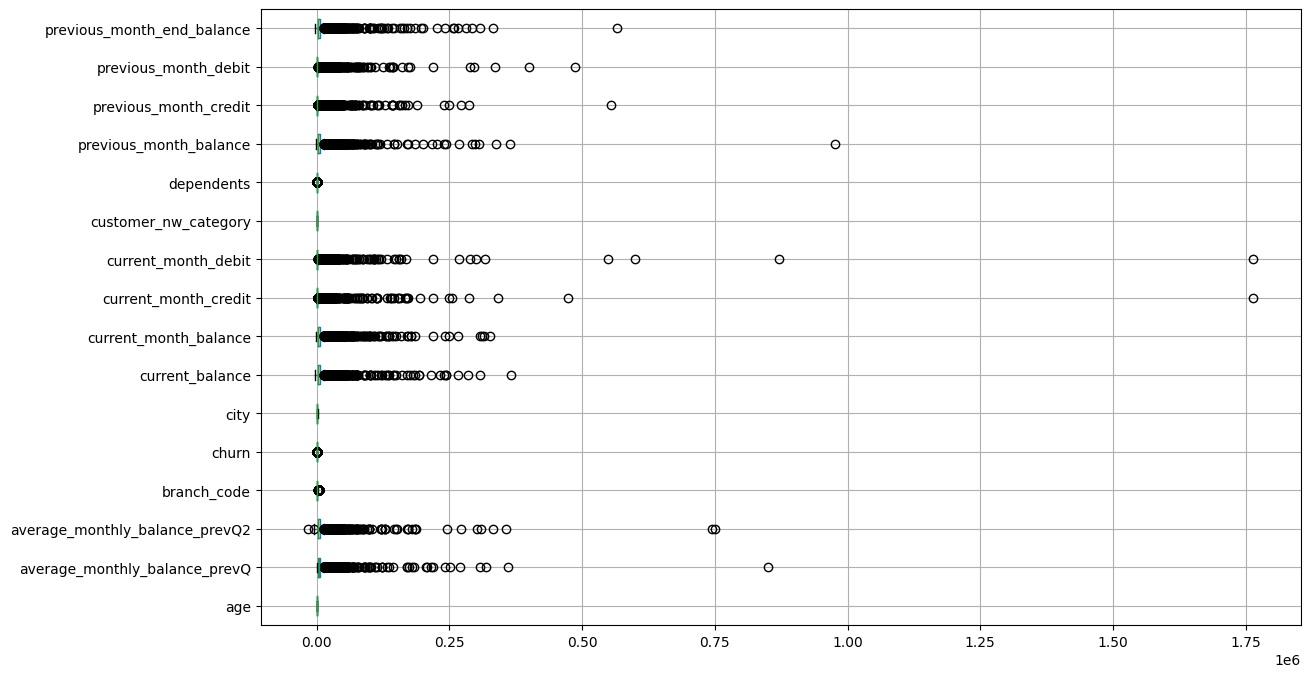

In [83]:
# Outlier Analysis

# Select columns to exclude
exclude_columns = ['vintage']

# Select the subset of the DataFrame excluding the specified columns
train = test[test.columns.difference(exclude_columns)]

# Plotting the boxplot for the selected subset
plt.figure(figsize=(16, 8))
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

##### 1. Removing Outliers
Using IQR because we removed some rows from train numerical data

In [84]:
print(f'Before filtering: {test.shape}')

Before filtering: (5677, 20)


###### remove outliers : current_balance

In [85]:
test = test[(test["current_balance"] >= low_limit) & (test["current_balance"] <= high_limit)]

In [86]:
test.shape

(4518, 20)

###### remove outliers : previous_month_end_balance

In [87]:
test = test[(test["previous_month_end_balance"] >= low_limit) & (test["previous_month_end_balance"] <= high_limit)]

In [88]:
test.shape

(4309, 20)

###### remove outliers : average_monthly_balance_prevQ

In [89]:
test = test[(test["average_monthly_balance_prevQ"] >= low_limit) & (test["average_monthly_balance_prevQ"] <= high_limit)]

In [90]:
test.shape

(4197, 20)

###### remove outliers : average_monthly_balance_prevQ2

In [91]:
test = test[(test["average_monthly_balance_prevQ2"] >= low_limit) & (test["average_monthly_balance_prevQ2"] <= high_limit)]

In [92]:
test.shape

(3957, 20)

###### remove outliers : current_month_credit

In [93]:
test = test[(test["current_month_credit"] >= low_limit) & (test["current_month_credit"] <= high_limit)]

In [94]:
test.shape

(3851, 20)

###### remove outliers : previous_month_credit

In [95]:
test = test[(test["previous_month_credit"] >= low_limit) & (test["previous_month_credit"] <= high_limit)]

In [96]:
test.shape

(3750, 20)

###### remove outliers : current_month_debit

In [97]:
test = test[(test["current_month_debit"] >= low_limit) & (test["current_month_debit"] <= high_limit)]

In [98]:
test.shape

(3715, 20)

###### remove outliers : previous_month_debit

In [99]:
test = test[(test["previous_month_debit"] >= low_limit) & (test["previous_month_debit"] <= high_limit)]

In [100]:
test.shape

(3635, 20)

###### remove outliers : current_month_balance

In [101]:
test = test[(test["current_month_balance"] >= low_limit) & (test["current_month_balance"] <= high_limit)]

In [102]:
test.shape

(3633, 20)

###### remove outliers : previous_month_balance

In [103]:
test = test[(test["previous_month_balance"] >= low_limit) & (test["previous_month_balance"] <= high_limit)]

In [104]:
test.shape

(3621, 20)

##### 2. Removing Duplicated

In [105]:
# Check duplicate
duplicates_all_test = test[test.duplicated(keep=False)]
print(f"Total exact duplicate entries in test: {duplicates_all_test.shape[0]}")

Total exact duplicate entries in test: 0


In [106]:
test = test.drop_duplicates(keep='first')
test.shape

(3621, 20)

#### 3. Missing Value Handling

##### Check missing values

In [107]:
test.isna().sum()

vintage                             0
age                                 0
gender                             57
dependents                        321
occupation                          9
city                               87
customer_nw_category                0
branch_code                         0
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit                0
current_month_balance               0
previous_month_balance              0
churn                               0
last_transaction                  523
dtype: int64

In [108]:
test.isnull().sum()

vintage                             0
age                                 0
gender                             57
dependents                        321
occupation                          9
city                               87
customer_nw_category                0
branch_code                         0
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit                0
current_month_balance               0
previous_month_balance              0
churn                               0
last_transaction                  523
dtype: int64

##### Missing values check Nan

In [109]:
test.isnull().sum().sum()

997

In [110]:
test.isnull().any().any()

True

In [111]:
count_nan = test.isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: vintage                             0
age                                 0
gender                             57
dependents                        321
occupation                          9
city                               87
customer_nw_category                0
branch_code                         0
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit                0
current_month_balance               0
previous_month_balance              0
churn                               0
last_transaction                  523
dtype: int64


In [112]:
for column in test.columns[1:]:
    print(f"============= {column} =================")
    display(test[column].value_counts())
    print()

============= age =================


33    108
37    103
40     94
90     91
34     91
39     90
38     86
43     86
36     86
42     86
35     85
30     84
47     83
46     81
45     75
44     74
52     73
48     71
51     71
31     70
32     69
49     68
41     64
29     63
62     61
53     57
64     57
56     57
66     56
54     55
27     54
58     53
55     52
50     52
28     51
26     50
57     49
61     47
63     46
60     46
65     44
70     40
68     40
24     39
67     39
59     38
25     36
74     33
71     32
69     31
72     29
23     27
73     26
22     24
21     23
75     22
78     18
19     17
76     16
79     16
20     15
10     14
18     14
77     13
17     12
14     11
7      10
83      9
15      9
6       9
9       9
16      9
8       9
81      9
5       8
13      8
11      8
80      8
3       7
82      7
12      7
84      6
86      6
89      5
4       5
88      3
85      2
87      2
2       2
Name: age, dtype: int64


============= gender =================


Male      2028
Female    1536
Name: gender, dtype: int64


============= dependents =================


0.0    2785
2.0     267
1.0     161
3.0      53
4.0      21
5.0      11
7.0       1
6.0       1
Name: dependents, dtype: int64


============= occupation =================


self_employed    2175
salaried          834
student           338
retired           261
company             4
Name: occupation, dtype: int64


============= city =================


1020.0    390
1096.0    238
409.0     182
834.0     162
146.0     146
1232.0    103
334.0      92
623.0      88
15.0       74
575.0      71
1525.0     51
1111.0     42
905.0      39
1494.0     38
1084.0     37
649.0      37
318.0      36
656.0      34
61.0       31
491.0      31
1589.0     30
531.0      25
630.0      22
904.0      21
1076.0     20
621.0      19
1477.0     19
996.0      19
665.0      19
1181.0     18
745.0      17
363.0      17
1598.0     15
221.0      15
1271.0     14
243.0      14
11.0       14
485.0      14
372.0      13
1180.0     13
1597.0     13
241.0      12
1540.0     11
1621.0     11
557.0      11
1150.0     11
578.0      11
514.0      10
38.0       10
1643.0     10
479.0      10
1388.0      9
664.0       9
848.0       9
169.0       9
856.0       8
860.0       8
762.0       8
187.0       8
995.0       8
980.0       8
666.0       8
1154.0      8
579.0       7
698.0       7
1294.0      7
1322.0      7
751.0       7
388.0       6
1173.0      6
822.0       6
1085.0


============= customer_nw_category =================


2    1835
3    1506
1     280
Name: customer_nw_category, dtype: int64


============= branch_code =================


16      17
8       15
19      15
93      13
145     12
60      12
27      12
89      12
13      12
88      12
44      12
3       11
54      11
92      11
79      10
68      10
227     10
18      10
42      10
288     10
239     10
415      9
6        9
114      9
216      9
501      9
134      9
540      9
159      9
64       8
22       8
177      8
7        8
49       8
53       8
127      8
120      8
104      8
170      8
5        8
115      8
292      8
622      8
1929     7
531      7
149      7
86       7
814      7
158      7
503      7
1711     7
14       7
36       7
85       7
185      7
395      7
52       7
33       7
175      7
50       7
41       7
40       7
284      7
35       7
210      7
1365     7
15       7
572      7
234      7
184      7
118      7
176      7
43       7
443      7
163      6
1317     6
75       6
782      6
642      6
151      6
542      6
105      6
327      6
545      6
132      6
249      6
416      6
26       6
755      6
692      6
509      6


============= current_balance =================


 3763.71    2
 1428.79    2
 1756.94    2
 1643.04    2
 2097.79    2
 2273.21    2
 2040.93    2
 2864.89    2
 4992.66    2
 1832.63    2
 2672.40    1
 504.00     1
 4390.05    1
 2381.83    1
 1408.61    1
 118.43     1
 4986.04    1
 5791.92    1
 4461.17    1
 6624.54    1
 873.09     1
 4693.11    1
 4992.27    1
 3052.43    1
 4960.36    1
 1946.02    1
 4435.70    1
 3719.91    1
 7404.51    1
 6887.52    1
 6702.26    1
 6146.13    1
 1076.43    1
 4848.85    1
 5620.50    1
 3158.46    1
 1357.76    1
 458.73     1
 1758.04    1
 3839.84    1
 1607.05    1
 777.39     1
 1189.36    1
 4142.62    1
 1555.65    1
 6369.60    1
 3521.53    1
 3091.18    1
 1439.66    1
 958.99     1
 1431.55    1
 7006.63    1
 2111.25    1
 4541.84    1
 2071.86    1
 4408.63    1
 1829.00    1
 2109.18    1
 1468.49    1
 2450.15    1
 1806.36    1
 557.14     1
 4254.34    1
 3306.34    1
 3020.24    1
 3987.95    1
 2136.52    1
 5166.56    1
 4103.84    1
 3780.71    1
 2815.66    1
 1480.


============= previous_month_end_balance =================


1454.75    2
1429.04    2
1517.03    2
6817.40    2
3322.10    2
3105.35    2
1845.16    2
1888.00    2
4605.08    2
1600.39    2
1381.03    2
2067.51    2
3091.18    1
1076.43    1
5899.42    1
6603.91    1
4960.36    1
3862.77    1
4351.41    1
4137.41    1
6810.72    1
6702.26    1
6146.13    1
3052.43    1
2936.11    1
4644.67    1
4755.41    1
2046.51    1
1284.28    1
777.39     1
504.00     1
2234.94    1
1286.33    1
2664.90    1
4020.62    1
4023.83    1
5796.66    1
3624.61    1
4553.97    1
1439.66    1
423.59     1
1695.26    1
2423.21    1
1648.39    1
5483.27    1
2071.86    1
4408.63    1
5962.45    1
1915.01    1
2109.18    1
2737.46    1
2664.37    1
4962.46    1
2322.74    1
1946.02    1
4386.31    1
4524.69    1
333.53     1
2244.66    1
4986.04    1
5506.20    1
1538.62    1
4992.99    1
221.18     1
6111.04    1
2472.79    1
4266.56    1
4103.84    1
4292.93    1
2822.80    1
1477.93    1
4935.66    1
4459.64    1
2974.48    1
5599.08    1
1525.83    1
4672.95    1


============= average_monthly_balance_prevQ =================


3395.42    2
2310.24    2
1674.67    2
1472.53    2
2096.59    2
1476.77    2
1663.86    2
1450.99    2
1718.20    2
1495.63    2
1483.45    2
1884.38    2
1432.13    2
1798.38    2
1564.81    2
1431.15    2
1552.24    2
3223.21    2
2869.24    2
4134.95    2
2060.33    2
1737.85    2
4865.99    2
1431.06    1
2880.00    1
4239.28    1
2220.16    1
4632.91    1
4835.71    1
1792.03    1
5836.03    1
2551.95    1
4123.21    1
3554.60    1
6146.13    1
6168.76    1
4963.12    1
2282.19    1
3954.99    1
5401.66    1
6747.42    1
5665.39    1
4054.22    1
2526.54    1
4632.88    1
4208.44    1
2620.81    1
1447.87    1
5504.56    1
5170.87    1
3091.18    1
1857.47    1
1456.97    1
1663.74    1
3214.91    1
1738.33    1
2071.86    1
2586.20    1
4408.63    1
1606.41    1
2109.18    1
3452.83    1
2984.31    1
4223.99    1
3132.39    1
1946.02    1
4396.39    1
4581.68    1
1528.63    1
2160.96    1
3351.08    1
1617.99    1
2815.91    1
1891.64    1
4370.96    1
4103.84    1
4417.35    1


============= average_monthly_balance_prevQ2 =================


1424.43    2
1898.80    2
1105.84    2
1580.00    2
3489.14    2
1843.08    2
1051.05    2
2055.58    2
2077.26    2
1592.56    2
1742.50    2
6529.54    1
2918.21    1
948.60     1
7030.98    1
3823.79    1
4971.07    1
4607.73    1
2281.48    1
5859.14    1
6475.82    1
3845.50    1
2019.28    1
4526.63    1
6424.94    1
2787.70    1
1938.97    1
2271.86    1
2354.22    1
1098.82    1
2214.13    1
1533.50    1
5739.67    1
2379.98    1
5024.65    1
4047.62    1
4368.70    1
1667.39    1
3340.19    1
1361.29    1
3543.07    1
1166.39    1
4601.73    1
4303.57    1
3837.31    1
2683.21    1
621.78     1
2690.41    1
744.00     1
4500.85    1
2835.07    1
2060.36    1
4380.70    1
746.22     1
2746.88    1
3284.87    1
1630.54    1
5089.80    1
6422.80    1
1933.95    1
1753.33    1
4860.33    1
626.73     1
2824.65    1
1344.74    1
285.82     1
4335.88    1
4077.84    1
6020.64    1
2819.24    1
1518.95    1
886.23     1
3178.65    1
2955.64    1
5132.16    1
3356.43    1
6075.73    1


============= current_month_credit =================


0.59       67
0.34       60
0.43       59
0.70       59
0.49       58
0.63       57
0.19       56
0.07       56
0.10       56
0.53       56
0.54       53
0.03       51
0.16       50
0.36       50
0.04       48
0.17       48
0.57       48
0.11       48
0.14       47
0.47       47
0.29       47
0.39       46
0.64       46
0.56       46
0.44       46
0.24       46
0.06       46
0.60       45
0.01       45
0.41       44
0.26       43
0.51       43
0.21       42
0.20       42
0.69       41
0.46       41
0.33       41
0.27       41
0.13       41
0.61       40
0.30       40
0.23       40
0.09       40
0.40       39
0.50       38
0.37       37
0.31       37
0.66       37
0.67       32
429.17      3
428.96      3
714.59      3
142.96      3
286.19      3
285.80      2
142.93      2
1428.97     2
1428.76     2
2857.16     2
2857.49     2
1428.61     2
1285.80     2
1428.83     2
457.63      2
28.96       2
1286.29     2
142.99      2
1429.06     2
643.14      2
285.83      2
357.16      2
143.51


============= previous_month_credit =================


0.59       61
0.07       61
0.53       59
0.49       59
0.34       58
0.01       57
0.19       56
0.70       54
0.63       53
0.36       52
0.10       51
0.57       51
0.43       50
0.09       49
0.24       49
0.03       49
0.54       49
0.47       48
0.04       48
0.17       48
0.44       46
0.21       46
0.69       46
0.14       45
0.29       45
0.39       43
0.51       43
0.56       43
0.64       43
0.46       43
0.16       42
0.50       42
0.40       41
0.33       41
0.27       41
0.66       41
0.30       41
0.26       40
0.20       40
0.23       40
0.61       40
0.11       39
0.13       38
0.31       38
0.06       37
0.60       37
0.37       36
0.41       33
0.67       28
571.63      4
714.94      3
714.61      3
2857.57     3
357.61      3
714.43      3
1428.94     3
286.34      2
143.14      2
71.94       2
571.54      2
1429.14     2
285.99      2
428.70      2
1.10        2
21.61       2
285.83      2
2857.56     2
1428.76     2
143.17      2
571.93      2
572.13      2
157.03


============= current_month_debit =================


0.07       50
0.49       49
0.53       49
0.63       47
0.34       47
0.59       47
0.43       45
0.19       44
0.10       43
0.01       43
0.17       43
0.11       43
0.47       41
0.04       41
0.57       40
0.03       40
0.54       38
0.16       38
0.36       38
0.66       38
0.60       37
0.30       37
0.64       37
0.39       37
0.24       36
0.33       36
0.09       36
0.14       35
0.70       35
0.44       35
0.20       34
0.69       34
0.23       34
0.21       34
0.29       33
0.61       33
0.37       33
0.56       33
0.41       32
0.46       32
0.06       32
0.13       31
0.51       30
0.40       28
0.27       28
0.67       27
0.31       27
0.50       25
0.26       23
1428.64     5
142.99      4
714.87      3
357.53      3
3571.89     3
285.87      3
571.60      3
72.01       3
285.90      3
714.93      3
285.79      3
285.86      3
857.74      3
28.93       2
571.66      2
1143.33     2
2857.27     2
571.93      2
714.31      2
285.93      2
2142.99     2
714.70      2
7143.0


============= previous_month_debit =================


0.34       51
0.07       51
0.19       47
0.43       45
0.49       45
0.53       45
0.59       44
0.63       44
0.11       43
0.36       43
0.03       42
0.01       41
0.10       41
0.16       40
0.17       40
0.57       39
0.47       37
0.04       37
0.56       37
0.54       37
0.60       37
0.39       37
0.41       36
0.40       36
0.33       36
0.21       35
0.66       35
0.09       35
0.70       35
0.14       34
0.06       34
0.61       34
0.46       34
0.44       34
0.13       33
0.23       33
0.20       33
0.51       32
0.30       32
0.37       32
0.24       31
0.64       30
0.27       29
0.29       29
0.67       28
0.26       28
0.69       27
0.50       27
0.31       23
286.13      4
143.37      4
214.46      3
72.01       3
200.70      3
1428.61     3
1428.86     3
128.66      2
72.13       2
143.19      2
2857.21     2
714.53      2
1857.33     2
571.51      2
214.87      2
500.60      2
157.49      2
2857.84     2
657.73      2
1428.94     2
1428.69     2
143.00      2
143.17


============= current_month_balance =================


1575.60    2
2360.53    2
1563.96    2
1460.23    2
1892.76    2
4456.37    1
5914.77    1
1783.64    1
2948.00    1
6702.26    1
5488.09    1
5752.51    1
5436.47    1
4960.36    1
4139.44    1
5806.00    1
6823.96    1
1076.43    1
6146.13    1
151.96     1
3052.43    1
4692.72    1
4531.76    1
1356.81    1
504.00     1
2190.60    1
1589.28    1
3743.97    1
3774.32    1
4986.04    1
4389.66    1
4450.79    1
6111.04    1
1821.56    1
3656.59    1
1607.05    1
777.39     1
1534.19    1
4141.72    1
1544.60    1
5663.19    1
3539.30    1
3091.18    1
1439.66    1
888.37     1
1467.92    1
6169.86    1
1967.60    1
4825.19    1
2071.86    1
4408.63    1
1940.86    1
2109.18    1
2565.15    1
2627.98    1
5900.47    1
3072.00    1
1946.02    1
1252.54    1
4670.38    1
2336.36    1
222.24     1
4103.84    1
4077.40    1
2811.23    1
1473.00    1
6029.26    1
50.77      1
1288.96    1
5551.19    1
1525.83    1
4672.95    1
2463.93    1
2035.29    1
3968.02    1
7166.44    1
5610.97    1


============= previous_month_balance =================


2668.73    2
3701.42    2
3110.90    2
3012.35    2
1450.99    2
3020.24    2
4163.11    2
3618.07    2
1845.16    2
3936.63    2
2569.18    2
1465.07    2
4743.14    2
4992.99    1
4986.04    1
4638.88    1
4261.96    1
2936.11    1
310.88     1
4606.40    1
5796.66    1
4960.36    1
4146.02    1
4097.48    1
6614.54    1
1946.02    1
3862.77    1
5069.89    1
6751.26    1
5780.60    1
6146.13    1
1076.43    1
3052.43    1
4749.45    1
4397.18    1
2083.45    1
2169.58    1
3185.73    1
3454.12    1
1900.06    1
2132.97    1
1614.05    1
754.20     1
2389.34    1
1775.73    1
1471.19    1
5734.80    1
5297.73    1
3091.18    1
1550.25    1
1375.46    1
1691.27    1
2477.79    1
1647.60    1
4165.02    1
2071.86    1
4408.63    1
1756.02    1
2109.18    1
3577.61    1
1222.79    1
4846.34    1
1341.63    1
2424.56    1
2234.94    1
2420.58    1
4678.15    1
2831.92    1
2036.36    1
4274.85    1
4103.84    1
4418.32    1
2822.34    1
1480.69    1
4382.67    1
4330.61    1
2974.48    1


============= churn =================


0    3090
1     531
Name: churn, dtype: int64


============= last_transaction =================


2019-12-31    170
2019-12-17     79
2019-12-27     70
2019-12-19     69
2019-12-25     66
2019-12-28     65
2019-12-14     61
2019-12-10     60
2019-12-20     58
2019-12-24     54
2019-12-03     50
2019-12-07     49
2019-12-18     49
2019-12-26     48
2019-12-11     46
2019-12-05     44
2019-12-22     43
2019-12-04     43
2019-12-08     42
2019-12-21     36
2019-12-12     36
2019-12-13     34
2019-11-26     31
2019-12-06     30
2019-11-29     30
2019-11-28     27
2019-11-13     24
2019-12-01     24
2019-11-19     24
2019-11-20     23
2019-11-09     23
2019-11-21     22
2019-10-22     22
2019-10-30     22
2019-11-05     21
2019-11-14     21
2019-11-01     20
2019-10-16     19
2019-10-29     19
2019-10-31     19
2019-11-22     18
2019-10-09     17
2019-11-30     17
2019-11-15     17
2019-11-07     17
2019-10-15     17
2019-11-12     17
2019-11-23     17
2019-10-17     17
2019-11-03     16
2019-10-19     16
2019-11-06     15
2019-11-08     15
2019-10-12     15
2019-11-17     15
2019-11-02

##### Check percentage of missing value in each column selection

In [113]:
#check percentage missing value
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  \
vintage                                                vintage   
age                                                        age   
gender                                                  gender   
dependents                                          dependents   
occupation                                          occupation   
city                                                      city   
customer_nw_category                      customer_nw_category   
branch_code                                        branch_code   
current_balance                                current_balance   
previous_month_end_balance          previous_month_end_balance   
average_monthly_balance_prevQ    average_monthly_balance_prevQ   
average_monthly_balance_prevQ2  average_monthly_balance_prevQ2   
current_month_credit                      current_month_credit   
previous_month_credit                    previous_month_credit   
current_month_debit                        current_month_debit   
previous_month_debit                      previous_month_debit   
current_month_balance                    current_month_balance   
previous_month_balance                  previous_month_balance   
churn                                                    churn   
last_transaction                              last_transaction   

                                percent_missing  
vintage                                0.000000  
age                                    0.000000  
gender                                 1.574151  
dependents                             8.864954  
occupation                             0.248550  
city                                   2.402651  
customer_nw_category                   0.000000  
branch_code                            0.000000  
current_balance                        0.000000  
previous_month_end_balance             0.000000  
average_monthly_balance_prevQ          0.000000  
average_monthly_balance_prevQ2         0.000000  
current_month_credit                   0.000000  
previous_month_credit                  0.000000  
current_month_debit                    0.000000  
previous_month_debit                   0.000000  
current_month_balance                  0.000000  
previous_month_balance                 0.000000  
churn                                  0.000000  
last_transaction                      14.443524

From the result code above, we saw that there are also missing value in several columns. Below is the list of all missing value for each column :
- gender : NaN
- dependents : NaN
- occupation : NaN
- city : NaN
- last_transaction : NaN
- columns related finances : negative values

###### Imputation data for : Gender

In [114]:
# Calculate the mode for the 'gender' column
mode_gender_test = test['gender'].mode()[0]

# Replace NaN values with the mode
test['gender'] = test['gender'].fillna(mode_gender_test)

# Verify the operation
print(test['gender'].isnull().sum())  # If if all NaNs are filled, it should be 0

0


###### Imputation data for : Dependants

In [115]:
# Convert the 'dependents' column to numeric, coercing 'NaN' strings to NaN values
test['dependents'] = pd.to_numeric(test['dependents'], errors='coerce')

# Calculate the median without NaN values
median_dependants_test = test['dependents'].median()

# Replace NaN values with the median
test['dependents'] = test['dependents'].fillna(median_dependants_test)

###### Imputation data for : Occupation

In [116]:
# Calculate the mode for the 'occupation' column
mode_occupation_test = test['occupation'].mode()[0]

# Replace NaN values with the mode
test['occupation'] = test['occupation'].fillna(mode_gender_test)

# Verify the operation
print(test['occupation'].isnull().sum())  # If if all NaNs are filled, it should be 0

0


###### Imputation data for : City

Categorical variables like "city" are often encoded as numerical values. Each unique number represents a different category. This is done maybe for memory efficiency or model requirements

In [117]:
# Convert 'NaN' strings to np.nan
test['city'] = test['city'].replace('NaN', np.nan)

# Impute with mode
mode_city = test['city'].mode()[0]
test['city'] = test['city'].fillna(mode_city)

In [118]:
print(train['city'].isnull().sum())  # Should be 0 if all NaNs are filled

139


###### Imputation data for : last_transaction

Imputing datetime variables can be a bit more complex than numerical imputations because the mean or median concepts don't directly apply. Hence we are using a Fixed Date

In [119]:
# Using a specific date far in the past to denote missing dates
fixed_date = pd.to_datetime('1900-01-01')
test['last_transaction'] = test['last_transaction'].fillna(fixed_date)

###### Imputation data for : balances, credits, and debits

When we check the values of variables related to finances, we noticed that there are negative values which not makes sense to be in these variables and NaN values (string) not detected when we do isna().sum(). Hence, we imputed with median data

In [120]:
# Loop through each column
for col in financial_cols_to_check:
    # Replace negative values with NaN for later imputation
    test.loc[test[col] < 0, col] = pd.NA

# Determine the imputation value for each column
# Using median of the positive values of each column
for col in financial_cols_to_check:
    median_value = test[(test[col].notna()) & (test[col] > 0)][col].median()  # Calculate median of non-NaN and non-Negative values
    test[col] = test[col].fillna(median_value)  # Impute NaN values with the median

##### Check again for each column

In [121]:
#check percentage missing value
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  \
vintage                                                vintage   
age                                                        age   
gender                                                  gender   
dependents                                          dependents   
occupation                                          occupation   
city                                                      city   
customer_nw_category                      customer_nw_category   
branch_code                                        branch_code   
current_balance                                current_balance   
previous_month_end_balance          previous_month_end_balance   
average_monthly_balance_prevQ    average_monthly_balance_prevQ   
average_monthly_balance_prevQ2  average_monthly_balance_prevQ2   
current_month_credit                      current_month_credit   
previous_month_credit                    previous_month_credit   
current_month_debit                        current_month_debit   
previous_month_debit                      previous_month_debit   
current_month_balance                    current_month_balance   
previous_month_balance                  previous_month_balance   
churn                                                    churn   
last_transaction                              last_transaction   

                                percent_missing  
vintage                                     0.0  
age                                         0.0  
gender                                      0.0  
dependents                                  0.0  
occupation                                  0.0  
city                                        0.0  
customer_nw_category                        0.0  
branch_code                                 0.0  
current_balance                             0.0  
previous_month_end_balance                  0.0  
average_monthly_balance_prevQ               0.0  
average_monthly_balance_prevQ2              0.0  
current_month_credit                        0.0  
previous_month_credit                       0.0  
current_month_debit                         0.0  
previous_month_debit                        0.0  
current_month_balance                       0.0  
previous_month_balance                      0.0  
churn                                       0.0  
last_transaction                            0.0

### Encoding :
1. Recency (Last Transaction): Calculate the number of days between the "last transaction" date and a reference date (e.g., the date when the model is being run or the end date of the data collection period). Recency is a powerful indicator of churn; customers who haven't transacted recently/within a year are often more likely to churn.
2. OHE (gender, inactive_year)
3. Mean Encoding (Occupation)

##### 1. Recency (Last Transaction)

In [122]:
# Convert 'last_transaction' to datetime format
train['last_transaction'] = pd.to_datetime(train['last_transaction'])

# Find the most recent transaction date in last_transaction
current_date = train['last_transaction'].max()

# Calculate 'recency' as the number of days from the last transaction to the most recent transaction date
train['recency'] = (current_date - train['last_transaction']).dt.days

# Identify customers who haven't transacted within a year from the most recent transaction date
train['inactive_year'] = train['recency'] > 365

train = train.drop('last_transaction', axis=1)

In [123]:
train.sample()

age  average_monthly_balance_prevQ  \
customer_id                                       
16606         62                        7758.92   

             average_monthly_balance_prevQ2  branch_code  churn    city  \
customer_id                                                               
16606                               3600.27         1604      0  1621.0   

             current_balance  current_month_balance  current_month_credit  \
customer_id                                                                 
16606                7920.66                7797.18                227.14   

             current_month_debit  customer_nw_category  dependents gender  \
customer_id                                                                 
16606                       4.68                     3         NaN   Male   

            occupation  previous_month_balance  previous_month_credit  \
customer_id                                                             
16606          retired                 7717.57                   0.63   

             previous_month_debit  previous_month_end_balance  recency  \
customer_id                                                              
16606                      194.51                     7717.57     10.0   

             inactive_year  
customer_id                 
16606                False

In [124]:
# Convert 'last_transaction' to datetime format in the test data
test['last_transaction'] = pd.to_datetime(test['last_transaction'])

# Step 3: Calculate 'recency' for the test data using the same current_date from train data
test['recency'] = (current_date - test['last_transaction']).dt.days

# Step 4: Identify customers in the test data who haven't transacted within a year from the most recent transaction date in the TRAIN data
test['inactive_year'] = test['recency'] > 365


test = test.drop('last_transaction', axis=1)

In [125]:
test.sample()

vintage  age gender  dependents     occupation    city  \
customer_id                                                           
19423           2424   50   Male         1.0  self_employed  1449.0   

             customer_nw_category  branch_code  current_balance  \
customer_id                                                       
19423                           2          610          6317.03   

             previous_month_end_balance  average_monthly_balance_prevQ  \
customer_id                                                              
19423                           6611.17                        6156.13   

             average_monthly_balance_prevQ2  current_month_credit  \
customer_id                                                         
19423                               5155.01               2857.64   

             previous_month_credit  current_month_debit  previous_month_debit  \
customer_id                                                                     
19423                          0.5              3141.17                571.93   

             current_month_balance  previous_month_balance  churn  recency  \
customer_id                                                                  
19423                      5271.48                 6733.94      0        0   

             inactive_year  
customer_id                 
19423                False

##### OHE (Gender, Inactive_year)

In [126]:
#OHE
encode_ohe = ['gender', 'inactive_year']
train = pd.get_dummies(train, columns=encode_ohe)
test = pd.get_dummies(test, columns=encode_ohe)

##### Mean Encoding (Occupation)

In [127]:
# Calculate mean target value for each category in the training data
mean_encode = train.groupby('occupation')['churn'].mean()

# Create a new column in the training data with mean encoding
train['occupation'] = train['occupation'].map(mean_encode)

In [128]:
# Apply the calculated mean encoding to the test data
test['occupation'] = test['occupation'].map(mean_encode)

# For categories in the test set that didn't appear in the training set,
# fill NaNs with a global mean or another value
global_mean = test['churn'].mean()
test['occupation'].fillna(global_mean, inplace=True)

In [129]:
train.head()

age  average_monthly_balance_prevQ  \
customer_id                                       
9882          46                      242295.55   
6225          49                        7667.86   
28813         48                        1926.65   
21486         37                        4992.99   
7350          46                        3134.70   

             average_monthly_balance_prevQ2  branch_code  churn    city  \
customer_id                                                               
9882                              148959.54         1711      1   169.0   
6225                               11211.81           65      0  1034.0   
28813                                232.78         1789      0  1163.0   
21486                               5024.65           57      0  1540.0   
7350                                2969.77           93      0   491.0   

             current_balance  current_month_balance  current_month_credit  \
customer_id                                                                 
9882                63991.11              130434.46                  0.33   
6225                 6759.35                6759.35                  0.69   
28813               18889.19                5368.82                  0.47   
21486                4992.99                4992.99                  0.10   
7350                 2025.42                2297.01                  0.36   

             current_month_debit  customer_nw_category  dependents  \
customer_id                                                          
9882                   300286.04                     1         0.0   
6225                        0.69                     1         0.0   
28813                    9759.93                     3         0.0   
21486                       0.10                     2         0.0   
7350                     2504.00                     3         2.0   

             occupation  previous_month_balance  previous_month_credit  \
customer_id                                                              
9882           0.197584               292848.26                   0.33   
6225           0.177083                 6813.40                 256.44   
28813          0.197584                  287.29                 571.90   
21486          0.177083                 4992.99                   0.10   
7350           0.197584                 4117.55                   0.36   

             previous_month_debit  previous_month_end_balance  recency  \
customer_id                                                              
9882                         0.33                   292848.26     91.0   
6225                       934.32                     6759.35     35.0   
28813                      599.24                       77.22     40.0   
21486                        0.10                     4992.99      NaN   
7350                         0.36                     4486.21      NaN   

             gender_Female  gender_Male  inactive_year_False  
customer_id                                                   
9882                     0            1                    1  
6225                     0            1                    1  
28813                    0            1                    1  
21486                    0            1                    1  
7350                     0            1                    1

In [130]:
test.head()

vintage  age  dependents  occupation    city  \
customer_id                                                 
21486           2175   37         0.0    0.177083  1540.0   
7350            2224   46         2.0    0.197584   491.0   
24548           1416   26         0.0    0.177083   409.0   
6392            2435   46         0.0    0.197584   409.0   
18670           2230   16         0.0    0.151242  1096.0   

             customer_nw_category  branch_code  current_balance  \
customer_id                                                       
21486                           2           57          4992.99   
7350                            3           93          2025.42   
24548                           2          139          1613.10   
6392                            3          330          4015.28   
18670                           3          614          2123.50   

             previous_month_end_balance  average_monthly_balance_prevQ  \
customer_id                                                              
21486                           4992.99                        4992.99   
7350                            4486.21                        3134.70   
24548                           1731.03                        1866.07   
6392                            3871.94                        3543.28   
18670                           2123.50                        2123.50   

             average_monthly_balance_prevQ2  current_month_credit  \
customer_id                                                         
21486                               5024.65                  0.10   
7350                                2969.77                  0.36   
24548                               2314.64                  0.33   
6392                                2595.03                500.26   
18670                               2110.46                  0.24   

             previous_month_credit  current_month_debit  previous_month_debit  \
customer_id                                                                     
21486                         0.10                 0.10                  0.10   
7350                          0.36              2504.00                  0.36   
24548                        71.76                58.26                150.47   
6392                       1428.83               364.06                175.20   
18670                         0.24                 0.24                  0.24   

             current_month_balance  previous_month_balance  churn  recency  \
customer_id                                                                  
21486                      4992.99                 4992.99      0    43828   
7350                       2297.01                 4117.55      0    43828   
24548                      1664.99                 1829.11      0       47   
6392                       4022.02                 3989.51      0       12   
18670                      2123.50                 2123.50      0      291   

             gender_Female  gender_Male  inactive_year_False  \
customer_id                                                    
21486                    0            1                    0   
7350                     0            1                    0   
24548                    1            0                    1   
6392                     0            1                    1   
18670                    0            1                    1   

             inactive_year_True  
customer_id                      
21486                         1  
7350                          1  
24548                         0  
6392                          0  
18670                         0

In [131]:
# Check NaN values again
nan_columns = train.isna().sum()
nan_columns = nan_columns[nan_columns > 0]

print(nan_columns)

city          139
dependents    470
occupation     14
recency       647
dtype: int64


In [132]:
# Check NaN values again
nan_columns = test.isna().sum()
nan_columns = nan_columns[nan_columns > 0]

print(nan_columns)

Series([], dtype: int64)


In [133]:
# Replace NaN in 'city' and 'occupation' with their modes
for column in ['city', 'occupation']:
    mode_value = train[column].mode()[0]  # Calculate the mode
    train[column] = train[column].fillna(mode_value)  # Fill NaN with the mode

# Replace NaN in 'dependents' and 'recency' with their medians
for column in ['dependents', 'recency']:
    median_value = train[column].median()  # Calculate the median
    train[column] = train[column].fillna(median_value)  # Fill NaN with the median

# After replacement, check for remaining NaN values in the entire DataFrame
nan_columns_after = train.isna().sum()

# Filter to only show columns with remaining NaN values, if any
nan_columns_after = nan_columns_after[nan_columns_after > 0]

print(nan_columns_after)

Series([], dtype: int64)


## Split into Xtrain,ytrain,Xtest,ytest

In [134]:
#split dataset to X_train, y_train, X_test, y_test
y_train = train['churn']
X_train = train.drop(columns=['churn'])

y_test = test['churn']
X_test = test.drop(columns=['churn'])

### Feature Scaling :

#### Why choosing Standard Scaler?
The statistics provided suggest that the features in the dataset vary significantly in terms of their mean (average) values and standard deviations (variability). This variance in scale can impact the performance of many machine learning algorithms that are sensitive to feature scaling, such as:
- k-Nearest Neighbors (kNN) and Support Vector Machines (SVM)
- and gradient descent optimization in algorithms like Logistic Regression, Neural Networks, etc.


In [135]:
train.columns

Index(['age', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'branch_code', 'churn', 'city',
       'current_balance', 'current_month_balance', 'current_month_credit',
       'current_month_debit', 'customer_nw_category', 'dependents',
       'occupation', 'previous_month_balance', 'previous_month_credit',
       'previous_month_debit', 'previous_month_end_balance', 'recency',
       'gender_Female', 'gender_Male', 'inactive_year_False'],
      dtype='object')

In [136]:
test.columns

Index(['vintage', 'age', 'dependents', 'occupation', 'city',
       'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn', 'recency',
       'gender_Female', 'gender_Male', 'inactive_year_False',
       'inactive_year_True'],
      dtype='object')

In [141]:
from sklearn.preprocessing import StandardScaler

# Initialize the Standard Scaler
scaler = StandardScaler()

# Define columns to scale
cols_to_scale = ['age', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'branch_code', 'city',
       'current_balance', 'current_month_balance', 'current_month_credit',
       'current_month_debit', 'customer_nw_category', 'dependents',
       'occupation', 'previous_month_balance', 'previous_month_credit',
       'previous_month_debit', 'previous_month_end_balance', 'recency',
       'gender_Female', 'gender_Male', 'inactive_year_False']

In [144]:
# Standard scaling to train
X_train[['age_stds', 'average_monthly_balance_prevQ_stds',
       'average_monthly_balance_prevQ2_stds', 'branch_code_stds', 'city_stds',
       'current_balance_stds', 'current_month_balance_stds', 'current_month_credit_stds',
       'current_month_debit_stds', 'customer_nw_category_stds', 'dependents_stds',
       'occupation_stds', 'previous_month_balance_stds', 'previous_month_credit_stds',
       'previous_month_debit_stds', 'previous_month_end_balance_stds', 'recency_stds',
       'gender_Female_stds', 'gender_Male_stds', 'inactive_year_False_stds']] = scaler.fit_transform(train[cols_to_scale])

# Standard scaling to test
X_test[['age_stds', 'average_monthly_balance_prevQ_stds',
       'average_monthly_balance_prevQ2_stds', 'branch_code_stds', 'city_stds',
       'current_balance_stds', 'current_month_balance_stds', 'current_month_credit_stds',
       'current_month_debit_stds', 'customer_nw_category_stds', 'dependents_stds',
       'occupation_stds', 'previous_month_balance_stds', 'previous_month_credit_stds',
       'previous_month_debit_stds', 'previous_month_end_balance_stds', 'recency_stds',
       'gender_Female_stds', 'gender_Male_stds', 'inactive_year_False_stds']] = scaler.transform(test[cols_to_scale])

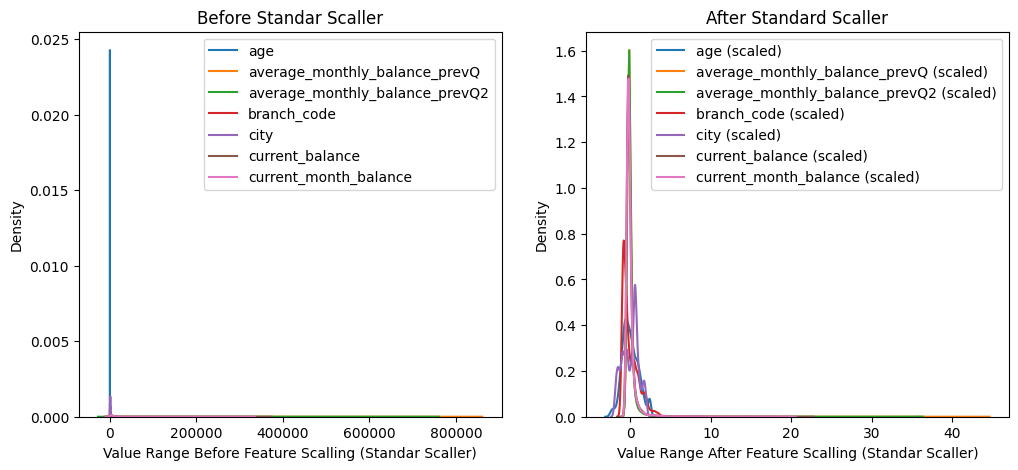

In [145]:
# A glimpse of data distribution before and after scaling, take sample only for 5 variables
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribution before scaling
ax1.set_title('Before Standar Scaller')
sns.kdeplot(X_train['age'], ax=ax1, label='age')
sns.kdeplot(X_train['average_monthly_balance_prevQ'], ax=ax1, label='average_monthly_balance_prevQ')
sns.kdeplot(X_train['average_monthly_balance_prevQ2'], ax=ax1, label='average_monthly_balance_prevQ2')
sns.kdeplot(X_train['branch_code'], ax=ax1, label='branch_code')
sns.kdeplot(X_train['city'], ax=ax1, label='city')
sns.kdeplot(X_train['current_balance'], ax=ax1, label='current_balance')
sns.kdeplot(X_train['current_month_balance'], ax=ax1, label='current_month_balance')

# Plot distribution after scaling
ax2.set_title('After Standard Scaller')
sns.kdeplot(X_train['age_stds'], ax=ax2, label='age (scaled)')
sns.kdeplot(X_train['average_monthly_balance_prevQ_stds'], ax=ax2, label='average_monthly_balance_prevQ (scaled)')
sns.kdeplot(X_train['average_monthly_balance_prevQ2_stds'], ax=ax2, label='average_monthly_balance_prevQ2 (scaled)')
sns.kdeplot(X_train['branch_code_stds'], ax=ax2, label='branch_code (scaled)')
sns.kdeplot(X_train['city_stds'], ax=ax2, label='city (scaled)')
sns.kdeplot(X_train['current_balance_stds'], ax=ax2, label='current_balance (scaled)')
sns.kdeplot(X_train['current_month_balance_stds'], ax=ax2, label='current_month_balance (scaled)')


# Set x-labels
ax1.set_xlabel('Value Range Before Feature Scalling (Standar Scaller)')
ax2.set_xlabel('Value Range After Feature Scalling (Standar Scaller)')

# Show legend
ax1.legend()
ax2.legend()

plt.show()

In [150]:
# Extract the cols scaled in train data
scaled_columns = [col for col in X_train.columns if col.endswith('_stds')]

# Create the DataFrame with only the scaled columns
X_train_scaled = X_train[scaled_columns].copy()

# Rename the columns to remove the '_stds' suffix for clarity
X_train_scaled.columns = [col.replace('_stds', '') for col in X_train_scaled.columns]

# Now, replace the original columns in 'train' with the scaled versions from 'train_scaled'
for col in X_train_scaled.columns:
    X_train[col] = X_train_scaled[col]

X_train_scaled.head()

age  average_monthly_balance_prevQ  \
customer_id                                            
9882        -0.091622                      12.299736   
6225         0.078915                       0.024812   
28813        0.022069                      -0.275549   
21486       -0.603233                      -0.115129   
7350        -0.091622                      -0.212348   

             average_monthly_balance_prevQ2  branch_code      city  \
customer_id                                                          
9882                               6.859237     0.814403 -1.471823   
6225                               0.206046    -0.931763  0.545032   
28813                             -0.324239     0.897150  0.845811   
21486                             -0.092793    -0.940250  1.724833   
7350                              -0.192043    -0.902059 -0.721040   

             current_balance  current_month_balance  current_month_credit  \
customer_id                                                                 
9882                3.544739               7.746540             -0.102619   
6225               -0.009534              -0.015546             -0.102606   
28813               0.743768              -0.102818             -0.102614   
21486              -0.119230              -0.126406             -0.102627   
7350               -0.303526              -0.295611             -0.102618   

             current_month_debit  customer_nw_category  dependents  \
customer_id                                                          
9882                    9.607184             -1.888111   -0.389515   
6225                   -0.109404             -1.888111   -0.389515   
28813                   0.206384              1.175718   -0.389515   
21486                  -0.109423             -0.356196   -0.389515   
7350                   -0.028402              1.175718    2.141997   

             occupation  previous_month_balance  previous_month_credit  \
customer_id                                                              
9882           0.693000               13.866722              -0.184029   
6225          -0.494496               -0.017559              -0.166399   
28813          0.693000               -0.334339              -0.144683   
21486         -0.494496               -0.105922              -0.184045   
7350           0.693000               -0.148417              -0.184027   

             previous_month_debit  previous_month_end_balance   recency  \
customer_id                                                               
9882                    -0.198054                   16.045813  0.298498   
6225                    -0.134753                   -0.016064 -0.372236   
28813                   -0.157463                   -0.391218 -0.312349   
21486                   -0.198070                   -0.115232 -0.432123   
7350                    -0.198052                   -0.143684 -0.432123   

             gender_Female  gender_Male  inactive_year_False  
customer_id                                                   
9882             -0.813563     0.840442                  0.0  
6225             -0.813563     0.840442                  0.0  
28813            -0.813563     0.840442                  0.0  
21486            -0.813563     0.840442                  0.0  
7350             -0.813563     0.840442                  0.0

In [151]:
# Extract the cols scaled in train data
scaled_columns = [col for col in X_test.columns if col.endswith('_stds')]

# Create the DataFrame with only the scaled columns
X_test_scaled = X_test[scaled_columns].copy()

# Rename the columns to remove the '_stds' suffix for clarity
X_test_scaled.columns = [col.replace('_stds', '') for col in X_test_scaled.columns]

# Now, replace the original columns in 'train' with the scaled versions from 'train_scaled'
for col in X_test_scaled.columns:
    X_test[col] = X_test_scaled[col]

X_test_scaled.head()

age  average_monthly_balance_prevQ  \
customer_id                                            
21486       -0.603233                      -0.115129   
7350        -0.091622                      -0.212348   
24548       -1.228535                      -0.278718   
6392        -0.091622                      -0.190972   
18670       -1.796992                      -0.265251   

             average_monthly_balance_prevQ2  branch_code      city  \
customer_id                                                          
21486                             -0.092793    -0.940250  1.724833   
7350                              -0.192043    -0.902059 -0.721040   
24548                             -0.223686    -0.853260 -0.912233   
6392                              -0.210143    -0.650637 -0.912233   
18670                             -0.233548    -0.349354  0.689592   

             current_balance  current_month_balance  current_month_credit  \
customer_id                                                                 
21486              -0.119230              -0.126406             -0.102627   
7350               -0.303526              -0.295611             -0.102618   
24548              -0.329132              -0.335277             -0.102619   
6392               -0.179949              -0.187346             -0.084477   
18670              -0.297435              -0.306500             -0.102622   

             current_month_debit  customer_nw_category  dependents  \
customer_id                                                          
21486                  -0.109423             -0.356196   -0.389515   
7350                   -0.028402              1.175718    2.141997   
24548                  -0.107541             -0.356196   -0.389515   
6392                   -0.097646              1.175718   -0.389515   
18670                  -0.109418              1.175718   -0.389515   

             occupation  previous_month_balance  previous_month_credit  \
customer_id                                                              
21486         -0.494496               -0.105922              -0.184045   
7350           0.693000               -0.148417              -0.184027   
24548         -0.494496               -0.259499              -0.179112   
6392           0.693000               -0.154632              -0.085694   
18670         -1.991368               -0.245209              -0.184035   

             previous_month_debit  previous_month_end_balance     recency  \
customer_id                                                                 
21486                   -0.198070                   -0.115232  524.153433   
7350                    -0.198052                   -0.143684  524.153433   
24548                   -0.187878                   -0.298368   -0.228507   
6392                    -0.186202                   -0.178171   -0.647716   
18670                   -0.198060                   -0.276334    2.693975   

             gender_Female  gender_Male  inactive_year_False  
customer_id                                                   
21486            -0.813563     0.840442                 -1.0  
7350             -0.813563     0.840442                 -1.0  
24548             1.229161    -1.189851                  0.0  
6392             -0.813563     0.840442                  0.0  
18670            -0.813563     0.840442                  0.0

In [164]:
X_train_scaled.shape

(5677, 20)

In [166]:
X_test_scaled.shape

(3621, 20)

## A. Data Modeling

## 4. Assignment Modelling
1. Gunakan Machine Learning Model dibawah ini :
- Logistic Regression
- KNN
- Decision tree
- SVM RBF
- Dengan ratio : class_weight bilamana terdapat imbalance pada dataset #class_weight = pembobotan, (kecuali pada KNN)
2. Lakukan fitting dan Model evaluasi di tiap model, keluarkan nilai pada confusion matrix (akurasi, recall, presisi, f1-score). Fokuslah pada nilai recall untuk menentukan model terbaik (melihat pada selisih nilai evaluasi di train dengan test) karena churn bisa kita fokuskan pada recall maupun presisi bila datanya tidak balance, jika balance maka bisa gunakan akurasi + recall atau akurasi + presisi.
3. Selain nilai confusion matrix yang dibandingkan antara train dan test untuk melihat overfitting atau underfitting, lakukan juga pengecekan learning curve untuk melihat modelnya optimal (model terbaik), atau underfitting, atau overfitting. Gunakanlah scoring ROC-AUC untuk matrix pada learning curve, cv = 5, lakukan concat pada X_train dengan X_test menjadi x, y_train dengan y_test menjadi y.

In [167]:
y_train.value_counts(normalize=True)

0    0.814691
1    0.185309
Name: churn, dtype: float64

### Logistic Regression

In [168]:
logistic_model = LogisticRegression(
    random_state = 42,
    class_weight = {0: 0.185309, 1: 0.814691} #class_weight = pembobotan
)

### KNN

In [169]:
knn_clf = KNeighborsClassifier()
# there is not a class weight in KNN

### Decision Tree

In [170]:
dt_clf = DecisionTreeClassifier(
    random_state = 42,
    class_weight = {0: 0.185309, 1: 0.814691}
)

### SVM RBF

In [171]:
svm_clf = SVC(
    random_state = 42,
    probability=True,
    class_weight = {0: 0.185309, 1: 0.814691}
)

## 5. Assignment Profitable : Cumulative Gain Plot
1. Gunakan model terbaik dari hasil evaluasi di soal nomor 4 diatas.
2. Gunakan plot_cumulative_gain dari scikitplot library
3. Pilih Kelas 1 (yes churn) dari hasil prediksi X_test, lakukan sampling (nilainya bebas) yang diambil dari plot_cumulative_gain
4. Hitunglah menggunakan rumus dibawah ini di excel :

### Langkah-langkah menghitung profitable :
1. Pilih berapa banyak sample misal 20% dari keseluruhan (kelas 1 dan 0)
- Kenapa secara teknis dilakukan keseluruhan sample tidak pada kelas 1 saja ? karena pemilihan samplenya dimulai dari hasil predict_probe dengan score tertinggi hingga terendah.
2. Lalu berapa nilai % responders dibagian kelas 1 (Poitive classes) yg didapat dari sample yg diambil / pada poin 1
- % responders (Gain) = jumlah orang yg diprediksi churn / keseluruhan prediksi kelas 1
- jumlah orang yg diprediksi churn = % responders (Gain) x keseluruhan prediksi kelas 1
3. Bandingkan model machine learning dengan random sampling hanya dapat berapa orang jumlah responder churn-nya

### Interpretasi hasil cumulative gain plot dan lift plot ada pada Excel.
**formula profitable**
1. Saved = Jumlah orang yang Churn baik dari prediksi model atau random sampling dari prediksi model
2. Failed = Orang yang gagal diprediksi sebagai Churn (False negatif : prediksi tidak churn tapi faktanya churn) atau Orang yang diprediksi churn tapi faktanya tidak churn (False Positif)
- Absolut (y_test (churn, data aktual churn) - y_pred (churn, data prediksi churn))
3. Asumsi biaya campaign = Rp 30.000 (2$ per bulan)
3. Potensi keuntungan per orang (15%) = 15% dari biaya campaign (15% * biaya campaign)
4. Failed Cost = Failed * Biaya campaign (per orang) + Failed * Potensi keuntungan per orang (15%)
5. Total Cost = Biaya campaign * jumlah orang yg diprediksi churn
6. Profit = Saved * potensi keuntungan (15%) * total cost
7. Netto = Profit - Total Cost - Failed Cost





## Fitting Model to Data

### Logistic Regression

In [172]:
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={0: 0.185309, 1: 0.814691}, random_state=42)

### KNN

In [173]:
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Decision Tree

In [174]:
dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight={0: 0.185309, 1: 0.814691}, random_state=42)

### SVM RBF

In [175]:
svm_clf.fit(X_train_scaled, y_train)

SVC(class_weight={0: 0.185309, 1: 0.814691}, probability=True, random_state=42)

## Model Evaluation

* TP : Prediksi Positif (yes churn) dan data y_test nya true (Yes churn) (sesuai prediksi)
* TN : Prediksi Negatif (No churn) dan data y_test (actual) nya true (No churn) (sesuai prediksi)
* FP : Prediksi Positif (yes churn) tapi data y_test false (negatif) (No churn) (Tidak sesuai prediksi)
* FN : Prediksi Negatif (No churn) tapi data y_test false (positif) (Yes churn (Tidak sesuai prediksi)
#### Notes :
1. Dari definisi diatas, kita fokus pada recall (berkaitan dengan FN , karena **FN itu berbanding terbalik dengan recall**)
2. dan juga presisi (berkaitan dengan FP karena **FP itu berbanding terbalik dengan presisi**).
3. Supaya Recall tinggi maka FN harus kecil,
4. supaya Presisi tinggi maka FP harus kecil.

In [176]:
def evaluate(model, x_test = X_test_scaled, y_test = y_test, x_train=X_train_scaled, y_train=y_train):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))

    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

In [178]:
#logistic regression
logreg_pred = logistic_model.predict(X_test_scaled)

# knn prediction
knn_pred = knn_clf.predict(X_test_scaled.values)

# decision tree prediction
dc_pred = dt_clf.predict(X_test_scaled)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Logistic Regression Evaluation

In [179]:
evaluate(logistic_model, x_test = X_test_scaled, y_test = y_test, x_train=X_train_scaled, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      4625
           1       0.42      0.70      0.52      1052

    accuracy                           0.76      5677
   macro avg       0.67      0.74      0.68      5677
weighted avg       0.83      0.76      0.78      5677

------
Assuming 1 as positive, we get for Data Train:

True Positive: 732
True Negative: 3608
False Positive: 1017
False Negative: 320

Accuracy Data Train: 0.7644882860665845
Precision Data Train: 0.41852487135506006
Recall Data Train: 0.6958174904942965
F1-Score Data Train: 0.5226704748304176
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      3090
           1       0.34      0.57      0.43       531

    accuracy                           0.78      3621
   macro avg       0.63      0.69      0.64

### KNN Evaluation

In [180]:
evaluate(knn_clf, x_test = X_test_scaled.values, y_test = y_test, x_train=X_train_scaled.values, y_train=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      4625
           1       0.74      0.19      0.30      1052

    accuracy                           0.84      5677
   macro avg       0.79      0.59      0.60      5677
weighted avg       0.82      0.84      0.80      5677

------
Assuming 1 as positive, we get for Data Train:

True Positive: 198
True Negative: 4554
False Positive: 71
False Negative: 854

Accuracy Data Train: 0.837061828430509
Precision Data Train: 0.7360594795539034
Recall Data Train: 0.188212927756654
F1-Score Data Train: 0.299772899318698


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3090
           1       0.73      0.13      0.22       531

    accuracy                           0.87      3621
   macro avg       0.80      0.56      0.57      3621
weighted avg       0.85      0.87      0.82      3621

------
Assuming 1 as positive, we get:

True Positive: 69
True Negative: 3065
False Positive: 25
False Negative: 462

Accuracy: 0.8655067660867164
Precision Data Test: 0.7340425531914894
Recall Data Test: 0.12994350282485875
F1-Score Data Test: 0.2208


### Decision Tree Evaluation

In [181]:
evaluate(dt_clf, x_test = X_test_scaled, y_test = y_test, x_train=X_train_scaled, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4625
           1       1.00      1.00      1.00      1052

    accuracy                           1.00      5677
   macro avg       1.00      1.00      1.00      5677
weighted avg       1.00      1.00      1.00      5677

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1052
True Negative: 4625
False Positive: 0
False Negative: 0

Accuracy Data Train: 1.0
Precision Data Train: 1.0
Recall Data Train: 1.0
F1-Score Data Train: 1.0
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3090
           1       0.93      0.98      0.96       531

    accuracy                           0.99      3621
   macro avg       0.96      0.99      0.97      3621
weighted avg       0.99      0.99      0.99      3621


### SVM RBF Evaluation

In [182]:
evaluate(svm_clf, x_test = X_test_scaled.values, y_test = y_test, x_train=X_train_scaled.values, y_train=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      4625
           1       0.44      0.63      0.52      1052

    accuracy                           0.79      5677
   macro avg       0.68      0.72      0.69      5677
weighted avg       0.82      0.79      0.80      5677

------
Assuming 1 as positive, we get for Data Train:

True Positive: 658
True Negative: 3802
False Positive: 823
False Negative: 394

Accuracy Data Train: 0.7856262110269508
Precision Data Train: 0.4442943956785955
Recall Data Train: 0.6254752851711026
F1-Score Data Train: 0.5195420450059218


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      3090
           1       0.25      0.54      0.34       531

    accuracy                           0.69      3621
   macro avg       0.57      0.63      0.57      3621
weighted avg       0.80      0.69      0.73      3621

------
Assuming 1 as positive, we get:

True Positive: 285
True Negative: 2219
False Positive: 871
False Negative: 246

Accuracy: 0.6915216790941728
Precision Data Test: 0.24653979238754326
Recall Data Test: 0.536723163841808
F1-Score Data Test: 0.3378778897451097


### Conclusion modeling
1. From the results of the 4 models above, we can see that the recall and precision are the most superior in Decision Tree because the test data has an the highest recall as well as precision and F1-score. compared of all. Although at the train data, value in train (1.0) to 0.98 slighly decreased in test data, this is more likely we might overfit the model

2. We use Decision Tree to calculate the potential profit of the business.

## Notes : Perbedaan predict dengan predict_proba
- `predict`: Menghasilkan label kelas biner berdasarkan threshold probabilitas bawaan (umumnya 0,5). Jika probabilitas prediksi untuk kelas positif lebih besar dari atau sama dengan 0,5, maka diprediksi sebagai kelas positif; sebaliknya, jika probabilitasnya kurang dari 0,5, maka diprediksi sebagai kelas negatif.

- `predict_proba`: Menghasilkan probabilitas prediksi untuk setiap kelas. Hasilnya adalah array dua dimensi di mana setiap baris mewakili sampel dan setiap kolom mewakili probabilitas untuk masing-masing kelas. Dengan menggunakan nilai threshold tertentu, Anda dapat mengubah hasil probabilitas ini menjadi prediksi biner.


## Cumulative Gain Plot

In [183]:
!pip install scikit-plot

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

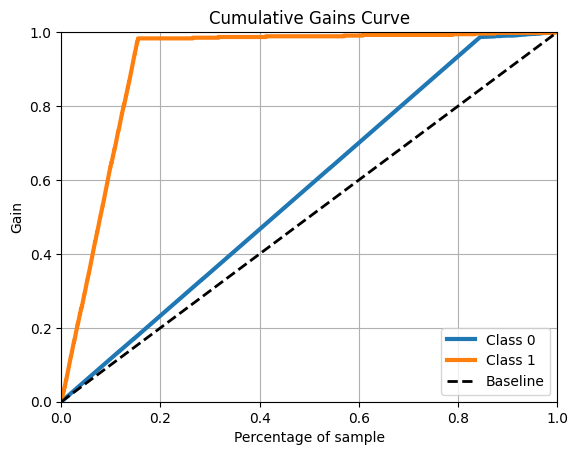

In [184]:
# load scikitplot untuk visualisasi metrik
### Decision Tree -> diambil yang paling best model
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, dt_clf.predict_proba(X_test_scaled))
#plot_cumulative_gain(y_actual, y_prediksi)

### Lift Chart

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

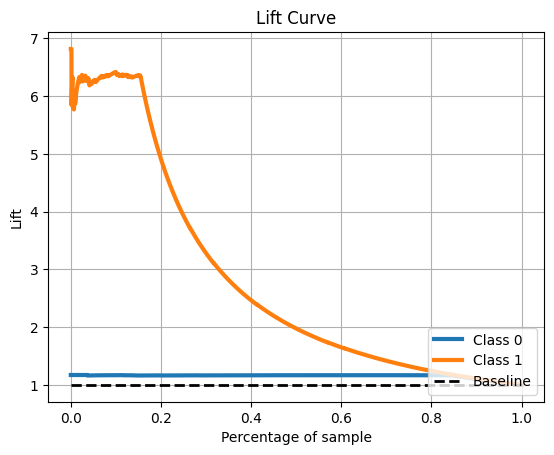

In [185]:
skplt.metrics.plot_lift_curve(y_test, dt_clf.predict_proba(X_test_scaled))

### Performance of Model Prediction Customer Churn

In [186]:
from sklearn.metrics import confusion_matrix
def value_prediction(y_actual, y_prediction):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_prediction).ravel()
    print('TN :',tn)
    print('TP :',tp)
    print('FN :',fn)
    print('FP :',fp)

In [188]:
value_prediction(y_test, dt_clf.predict(X_test_scaled))

TN : 3050
TP : 522
FN : 9
FP : 40


In [189]:
def get_value(y_actual, y_prediction):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_prediction).ravel()
    return tn, fp, fn, tp

In [190]:
tn, fp, fn, tp = get_value(y_test, dt_clf.predict(X_test_scaled))
class_1 = tp + fp
print('Prediction AI-ML class 1 (churn) :', class_1)
class_0 = tn + fn
print('Prediction AI-ML class 0 (No churn) :', class_0)

Prediction AI-ML class 1 (churn) : 562
Prediction AI-ML class 0 (No churn) : 3059


In [191]:
# sama as above
y_pred = pd.DataFrame(dt_clf.predict(X_test_scaled))
y_pred.value_counts()

0    3059
1     562
dtype: int64

In [192]:
print('total data on X_test_scaled :', 562 + 3059 )

total data on X_test_scaled : 3621


In [193]:
print(f'total population : {len(X_test_scaled)} people')
print(f'40% sample from all class 1 dan 0 : {0.4 * len(X_test_scaled)} people')
print(f'Sum % responders (Gain) potentially churn :, {0.8 * class_1} people')

total population : 3621 people
40% sample from all class 1 dan 0 : 1448.4 people
Sum % responders (Gain) potentially churn :, 449.6 people


In [194]:
print('1 = people who curn')
print('0 = people who are not churn')
print('In fact, after we do promotion in certain range time, we will get : ')
y_test.value_counts()

1 = people who curn
0 = people who are not churn
In fact, after we do promotion in certain range time, we will get : 


0    3090
1     531
Name: churn, dtype: int64

In [195]:
print(f'The fact, people who do not churn (Failed Prediction) : ,{0.8 * class_1 - 531} people')
print(f'People who really churn are : {531} people' )
print('Apart from that, using a lift chart, with a 40% sample we can get 2x better performance than random sampling of prediction results')

The fact, people who do not churn (Failed Prediction) : ,-81.39999999999998 people
People who really churn are : 531 people
Apart from that, using a lift chart, with a 40% sample we can get 2x better performance than random sampling of prediction results


In [196]:
#data actual
np.array(y_test)

array([0, 0, 0, ..., 1, 0, 1])

In [197]:
#Value Prediction
dt_clf.predict(X_test_scaled)

array([0, 0, 0, ..., 1, 0, 1])

### Performance of random sampling (random sampling from customers who have the potential to churn)

In [198]:
# From the gain chart above, if we take 40% sampling then we will get 40% customer churn respondents
# Then we might only get:

print(f'People who churn are : , {0.4 * class_1} orang')
print(f'The fact, people who do not churn (Failed Prediction) : {0.4 * class_1 - 373} orang')
print(f'The potential lift chart is only 1x with random drawing from the prediction results')

People who churn are : , 224.8 orang
The fact, people who do not churn (Failed Prediction) : -148.2 orang
The potential lift chart is only 1x with random drawing from the prediction results


## Notes :
Kumpulkan di LMS link google collab yang sudah dibuka aksesnya + sudah di run dan save output codenya + cantumkan link postingan linkedin di markdown google collab

### Link Postingan Linkedin (cantumkan disini) :